In [635]:
import multiprocess as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc

In [2]:
basedir = './국토교통부_건축물대장_표제부/'
bdinfo_df = pd.read_csv(basedir + 'simple_sorted.csv')
print(bdinfo_df.shape)
bdinfo_df.head()

(149344, 55)


c:\users\max6296\ml\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0.0,0,0.0,9,138.00,0,0.0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0.0,0,0.0,8,120.77,0,0.0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0.0,0,0.0,9,369.78,3,34.5,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용


In [3]:
print(bdinfo_df.shape)
bdinfo_df = bdinfo_df[bdinfo_df['건축_면적(㎡)'] != 0].reset_index(drop=True)
bdinfo_df.shape

(149344, 55)


(139724, 55)

In [4]:
nothing_df = bdinfo_df[(bdinfo_df['가구_수(가구)'] == 0)&(bdinfo_df['세대_수(세대)'] == 0)&(bdinfo_df['호_수(호)'] == 0)]
nothing_df.shape

(157, 55)

In [5]:
bdinfo_df = bdinfo_df.drop(nothing_df.index)
print(bdinfo_df.shape)

(139567, 55)


In [6]:
bdinfo_df['기타_용도'] = bdinfo_df['기타_용도'].fillna(bdinfo_df['주_용도'])
bdinfo_df['기타_용도'].isna().sum()

0

In [7]:
bdinfo_df.drop(columns=['옥내_기계식_면적(㎡)', '옥외_기계식_면적(㎡)', '옥내_자주식_면적(㎡)', '옥외_자주식_면적(㎡)'], inplace=True)

In [8]:
bdinfo_df['주_용도'].unique()

array(['공동주택', '종교시설', '제2종근린생활시설', '단독주택', '제1종근린생활시설', '업무시설',
       '문화및집회시설', '교육연구시설', '노유자시설', '숙박시설', '근린생활시설', '판매시설', '창고시설',
       '운동시설', '위험물저장및처리시설', '공장', '자동차관련시설', '의료시설'], dtype=object)

In [9]:
bdinfo_df['기타_용도'].unique()[:100]

array(['도시형생활주택,종교시설', '다세대주택(도시형생활주택-단지형)', '아파트', '공동주택',
       '근린생활시설,다가구주택', '도시형생활주택(단지형다세대)', '연립주택', '연립주택/교육연구및복지시설/근린생활시설',
       '다세대주택', '근린생활시설, 단독주택', '단독주택', '공동주택(다세대주택)', '다세대주택/근린생활시설',
       '공동주택(도시형생활주택)', '다세대주택(8세대)', '도시형생활주택', '도시형생활주택(단지형생활주택)',
       '다가구주택', '다세대주택(7세대)', '단독주택, 근린생활시설', '주거시설', '공동주택,근린생활시설',
       '연립주택/근린생활시설', '공동주택, 근린생활시설', '다세대주택,근린생활시설', '도시형생활주택(단지형다세대주택)',
       '도시형생활주택(단지형9세대)', '도시형생활주택(원룸형)', '도시형생활주택-단지형다세대', '근린생활시설 단독주택',
       '아파트/근린생활시설', '공동주택(다세대주택 14세대)', '다세대주택/교육연구및복지시설',
       '근린생활시설/다세대주택', '공동주택, 제2종 근린생활시설-일반음식점', '공동주택(다세대주택 9세대),근린생활시설',
       '단독주택 근린생활시설', '도시형생활주택(단지형11세대)', '주거시설 근린생활시설', '근린생활시설, 다세대주택',
       '도시형생활주택(단지형다세대 14세대)', '공동주택(다세대주택 7세대), 근린생활시설',
       '다세대주택(도시형생활주택)', '도시형생활주택(단지형다세대(10세대))', '공동주택(다세대주택-8세대)',
       '근린생활시설 주거시설', '공동주택(다세대주택-10세대)', '다세대주택(도시형생활주택-단지형다세대)', '오피스텔',
       '업무시설(오피스텔 15호실), 다세대주택(20세대), 근린생활시설', '근린생활시설/도시형생활주택(원룸형)',
       '근린생활시설 다가구주택', '업

In [10]:
bdinfo_df['기타_용도'].unique()[100:200]

array(['공동주택(다세대주택),근린생활시설,사무소', '공동주택(다세대주택 / 근생)',
       '도시형생활주택(15세대)근린생활시설', '공동주택 (연립주택)', '공동주택(다세대주택), 근린생활시설',
       '근생/다세대', '공동주택 (다세대주택/근생)', '도시형생활주택(원룸형28세대),근린생활시설',
       '공동주택 (연립주택) / 근생생활시설', '제2종근린생활시설, 다세대주택', '도시형생활주택(단지형)',
       '도시형생활주택, 근린생활시설', '주거시설   근린생활시설', '다가구주택, 근린생활시설',
       '공동주택 (다세대주택), 근린생활시설', '도시형생활주택(단지형다세대 16세대)', '단지형다세대,근린생활시설',
       '다세대주택(5세대)', '도시형생활주택(원룸형주택-15세대)', '공동주택,다세대 주택',
       '공동주택(근생 및 다세대주택)', '제2종근린생활시설/다세대주택(도시형생활주택-원룸)/다세대주택',
       '다세대주택및근린생활시설', '주거시설,근린생활시설', '다세대주택/제2종근린생활시설', '근린생활시설및다세대주택',
       '공동주택 근린생활시설', '도시형생활주택(단지형다세대-15세대)', '공동주택(다세대),근린생활시설',
       '다세대주택(12세대)', '도시형생활주택,근린생활시설', '도시형생활주택/근린생활시설/창고시설',
       '공동주택(아파트), 근린생활시설', '근린생활시설,도시형생활주택(단지형다세대 19세대)',
       '도시형생활주택(13세대)', '공동주택(다세대/근생)', '도시형생활주택(원룸형24세대)',
       '제1종근린생활시설(소매점), 공동주택', '공동주택,다세대', '다세대주택(11세대),근린생활시설',
       '공동주택(다세대주택 14세대),근린생활시설', '다세대주택(16세대)', '도시형생활주택(24세대)',
       '공동주택(다세대주택 18세대),근린생활시설', '도시형생활주택

In [11]:
bdinfo_df['기타_용도'].unique()[-100:]

array(['업무시설, 공동주택,근린생활시설', '(오피스텔),공동주택(연립주택),근린생활시설', '다가구용주택(2가구)',
       '업무시설(오피스텔/도시형생활주택(원룸형)/근린생활시설)', '아파트/근린생활시설/업무시설',
       '공동주택(다세대),근린생활시설,업무시설', '연립주택,업무시설(오피스텔),근린생활시설',
       '공동주택-근생및단지형다세대주택', '공동주택(단지형다세대주택및근생)',
       '근린생활시설&업무시설(오피스텔) 및 도시형생활주택(단지형다세대)', '근린생활시설 및 도시형생활주택(다세대주택)',
       '제1종근린생활시설,오피스텔,아파트', '업무시설,도시형생활주택(다세대주택),근린생활시설',
       '공동주택(도시형생활주택/오피스텔/근린생활시설)', '공동주택(다세대주택/근린생활시설/업무시설)',
       '공동주택(도시형생활주택/업무시설/근린생활시설)', '공동주택,업무시설(오피스텔),근린생활시설',
       '공동주택(다세대주택)/제2종근린생활시설/업무시설', '2종근생(학원), 도시형생활주택 단지형 다세대',
       '주택,점포,약국', '공동주택(다세대주택, 제2종근린생활시설-사무소)', '근린생활시설/도시형생활주택/업무시설',
       '점포 및 주택', '판매시설 및 도시형생활주택', '(도시형생활주택)단지형다세대',
       '제1종근린생활시설, 종교시설,다세대주택', '영업,주택', '도시형생활주택(단지형다세대)/업무시설(오피스텔)',
       '단독주택,근린생활시설,자동차관련시설', '업무시설(오피스텔),공동주택(원룸형다세대),사무소',
       '도시형생활주택 단지형 다세대주택)및 제2종근린생활시설', '(도시형생활주택 단지형 다세대주택)및 제2종근린생활시설',
       '공동주택(도시형생활주택-단지형다세대) 및 업무시설(오피스텔)', '오피스텔/공동주택(다세대)',
       '오피스텔(주거용),도시형생활주택', '단독주택/근린생활시설', '다

In [206]:
def extract_useful_info(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x_list = []
        x = x.replace('및', ',').replace('/', ',').replace('.', ',')
        splitted = x.split(',')
        
        if len(splitted) != 1:
            for s in splitted:
                s = s.replace(' ', '')
                x_list.append(s)
        else:
            x_list.append(x)
        
        for v in x_list:
            if (('원룸' in v)|('도시' in v)|('도사' in v)|('도형' in v))&('아파' in v):
                return '원룸형아파트'
            elif '아파' in v:
                return '일반아파트'
            elif ('원룸' in v)&(('도시' in v)|('도사' in v)|('도형' in v)):
                return '도시형원룸'
            elif '원룸' in v:
                return '일반원룸'
            elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v)):
                return '도시형다세대'
            elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('연립' in v)|('얀립' in v)):
                return '도시형연립'
            elif ('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v):
                return '일반다세대'
            elif ('연립' in v)|('얀립' in v):
                return '일반연립'
            elif '오피' in v:
                return '오피스텔'
            elif ('가구' in v)|('단독' in v)|('다중' in v)|(('단' in v)&('독' in v)):
                return '단독주택'
            elif '협동' in v:
                return '협동주택'
            
        for v in x_list:
            if ('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v):
                return '도시형unknown'
            elif ('공동' in v)|('공둥' in v):
                return '공동주택'
            elif '주택' in v:
                return '주택unknown'
            
        
        return '주택unknown'

In [207]:
bdinfo_df['기타용도_주택종류'] = bdinfo_df['기타_용도'].apply(extract_useful_info)

In [208]:
def extract_useful_info_test(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x_list = []
        x = x.replace('및', ',').replace('/', ',').replace('.', ',')
        splitted = x.split(',')
        
        if len(splitted) != 1:
            for s in splitted:
                s = s.replace(' ', '')
                x_list.append(s)
        else:
            x_list.append(x)
        
        for v in x_list:
            if (('원룸' in v)|('도시' in v)|('도사' in v)|('도형' in v))&('아파' in v):
                return v
            elif '아파' in v:
                return v
            elif ('원룸' in v)&(('도시' in v)|('도사' in v)|('도형' in v)):
                return v
            elif '원룸' in v:
                return v
            elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v)):
                return v
            elif (('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v))&(('연립' in v)|('얀립' in v)):
                return v
            elif ('다세' in v)|('다새' in v)|('디세' in v)|('디새' in v)|('댜세' in v)|('댜새' in v)|('대세' in v)|('대새' in v):
                return v
            elif ('연립' in v)|('얀립' in v):
                return v
            elif '오피' in v:
                return v
            elif ('가구' in v)|('단독' in v)|('다중' in v)|(('단' in v)&('독' in v)):
                return v
            elif '협동' in v:
                return v
            
        for v in x_list:
            if ('도시' in v)|('도사' in v)|('도형' in v)|('단지' in v):
                return v
            elif ('공동' in v)|('공둥' in v):
                return v
            elif '주택' in v:
                return v
            
        
        return x

In [209]:
bdinfo_df['기타용도_주택종류_test'] = bdinfo_df['기타_용도'].apply(extract_useful_info_test)

In [210]:
bdinfo_df['기타용도_주택종류'].value_counts()

일반다세대         63609
일반아파트         21121
공동주택          20230
도시형다세대         9106
주택unknown      8155
일반연립           7293
단독주택           4016
도시형unknown     2034
오피스텔           1887
도시형원룸          1405
협동주택            404
원룸형아파트          186
도시형연립            88
일반원룸             33
Name: 기타용도_주택종류, dtype: int64

In [154]:
bdinfo_df['기타용도_주택종류_test'].nunique()

2223

In [66]:
apart_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '원룸형아파트']
print(apart_df.shape)

(186, 53)


In [67]:
apart_df['기타용도_주택종류_test'].nunique()

53

In [68]:
apart_df['기타용도_주택종류_test'].value_counts()

아파트(도시형생활주택)                 39
아파트(도시형생활주택                  29
도시형생활주택(원룸형아파트)              23
아파트(도시형생활주택-원룸형)             13
아파트(도시형생활주택원룸형)              10
아파트(도시형생활주택(원룸형))             8
도시형생활주택(아파트원룸형)               6
도시형생활주택(아파트)                  4
공동주택(아파트-도시형생활주택)             3
도시형생활주택(아파트-원룸형)              3
아파트-도시형생활주택                   2
아파트(도시형생활주택 원룸형)              2
아파트(도시형)                      2
공동주택(도시형생활주택:원룸형아파트)          2
아파트(도시형생활주택(원룸형)              2
아파트(도시형생활주택원룸형)29세대           1
공동주택-아파트(도시형생활주택-원룸형)         1
도시형생활주택(원룸형아파트-25세대)          1
제2종근린생활시설(사무소)아파트(도시형생활주택     1
공동주택(도시형생활주택-원룸형아파트)          1
아파트(도시형생활주택원룸형:24)            1
공동주택-도시형생활주택(원룸아파트)           1
노인복지시설·아파트(도시형 원룸 27세대)       1
도시형생활주택 아파트(원룸)               1
아파트(도시형생활주택) 외2               1
아파트(도시형원룸24세대)                1
도시형생활주택(원룸형아파트-82세대)          1
아파트(원룸형주택)                    1
도심형생활주택(아파트-원룸형)              1
공동주택{아파트(도시형생활주택)}            1
아파트 29세대(원룸형도시형생활주택)          1
도시형생활주택(

In [69]:
normal_apart_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '일반아파트']
print(normal_apart_df.shape)

(20807, 53)


In [70]:
normal_apart_df['기타용도_주택종류_test'].nunique()

256

In [71]:
normal_apart_df['기타용도_주택종류_test'].value_counts()

아파트                   10364
공동주택(아파트)              9578
공동주택(아파트                 99
공동주택 (아파트)               83
공동주택<아파트>                34
아파트(19세대)                30
아파트(18세대)                29
공동주택(아파트)외1              22
아파트(12세대)                21
아파트 부대시설                 15
아파트(공동주택)                14
공동주택(아파트) 외1             13
아파트(30세대)                11
아파트(48세대)                11
공동주택(아파트) 외2             11
아파트(28세대)                 9
공동주택(아파트)외2               9
아파트(60세대)                 9
공동주택(아파트)외 3              7
아파트(56세대)                 7
공동주택(아파트)(126세대)          6
아파트(24세대)                 6
공동주택(아파트19세대)             6
공동주택(아파트)외 2              6
공동주택(아파트 79세대)            6
공동주택(아파트)(39세대)           6
공동주택(아파트)외 1              6
아파트(14세대)                 6
공동주택(임대아파트)               6
아파트(10세대)                 6
공동주택(아파트 58세대)            5
공동주택(아파트)(18세대)           5
아파트(16세대)                 5
아파트(35세대)                 5
공동주택(아파트) 근린생활시설          4
아파트(생활편익시설)         

In [72]:
normal_dasede_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '일반다세대']
normal_dasede_df.shape

(62036, 53)

In [73]:
normal_dasede_df['기타용도_주택종류_test'].nunique()

526

In [80]:
normal_dasede_df['기타용도_주택종류_test'].value_counts()[500:600]

공동주택(다세대-9)              1
공동주택(다세대(10))            1
공동주택(다세대주택-15세대)외 1      1
공동주택-다세대주택(8세대)          1
공동주택(다세대주택-5세대)          1
공동주택(다세대-14)             1
다세대 주택(13세대)             1
공동주택(다세대주택-8)            1
다세대주택(민간 단기임대주택-11세대)    1
다세대-11세대                 1
공동주택(다새대주택-10세대)         1
공동주택(다세대주택)제2종근린생활시설     1
공동주택(다세대주택(5)            1
공동주택다세대주택                1
공동주택(다세대 6세대)            1
공동주택(다세대주택-12)           1
다세주택(1세대)                1
다세대(5)                   1
다세대주택(8세대) 외1            1
공동주택(다세대주택:12세대)         1
공동주택(다세대주택16가구)          1
다세대주택-4세대                1
공동주택(다세대14세대)            1
다세대주택 (19세대)             1
다세대(19세대)                1
대세대주택(2세대)               1
Name: 기타용도_주택종류_test, dtype: int64

In [81]:
dosi_dasede_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '도시형다세대']
dosi_dasede_df.shape

(9090, 53)

In [82]:
dosi_dasede_df['기타용도_주택종류_test'].nunique()

772

In [90]:
dosi_dasede_df['기타용도_주택종류_test'].value_counts()[700:800]

공동주택(도시형생활주택:단지형-다세대)              1
다세대주택(도시형생활주택)외1                   1
공동주택(단지형다세대-11세대)                  1
도시형생활주택(단지형다세대주택 13세대)             1
도시형생활(다세대주택)                       1
도시형생활주택다세대형                        1
다세대주택(도시형생활주택단지형-10세대))            1
다세대주택(다세대주택(도시형생활주택단지형)            1
공동주택(도시형생활주택-단지형다세대)15세대           1
다세대주택(도시형생활주택단지형:13세대)             1
공동주택[도시형생활주택 (단지형다세대 15세대)]        1
공동주택[도시형생활주택-단지형다세대 10세대]          1
공동주택-도시형생활주택(다세대                   1
공동주택-도시형생활주택(단지형다세대13세대)           1
도시형생활주택(단지형)다세대주택7세대               1
도시형생활주택(단지형)다세대주택)                 1
도시형생활주택(단지형다세대 주택)                 1
공동주택(도시형생활주택단지형다세대)9세대             1
공동주택(도시형생활주택-단지형다세대 6세대)           1
도시형 생활주택(단지형 다세대주택14세대)            1
공동주택(도시형생활단지형다세대주택)                1
다세대주택(도시형생활주택(단지형다세대주택 12세대))      1
공동주택{도시형생활주택-단지형다세대주택]             1
다세대주택(도시형생활주택-12)                  1
공동주택(도시형생활주택 단지형다세대-7세대)           1
다세대주택(도시형생활주택-4세대                  1
도시형 생활주택(다세대주택:나동)                 1
도

In [117]:
normal_yunrip_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '일반연립']
normal_yunrip_df.shape

(7254, 53)

In [118]:
normal_yunrip_df['기타용도_주택종류_test'].nunique()

121

In [119]:
normal_yunrip_df['기타용도_주택종류_test'].value_counts()

연립주택                 6019
공동주택(연립주택)            390
연립주택(19세대)             83
연립주택(16세대)             79
연립주택(18세대)             67
연립주택(15세대)             62
연립주택(12세대)             45
연립주택(14세대)             44
연립주택(10세대)             44
연립주택(8세대)              38
공동주택(연립)               35
연립주택(17세대)             25
연립주택(9세대)              24
연립주택(19가구)             15
연립주택(13세대)             15
연립주택(6세대)              14
공동주택 (연립주택)            14
연립주택(18가구)             12
연립주택(11세대)             12
연립주택(14가구)             11
연립주택(임대전용주택)           10
연립주택(14)                9
연립주택(16가구)              9
연립주택(4세대)               8
연립주택(15가구)              7
연립주택(17가구)              6
연립주택(12)                5
연립주택(7세대)               5
연립주택(15)                5
공동(연립)주택                4
공동주택(연립주택16세대)          4
공동주택(연립주택8세대)           4
연립주택(10가구)              3
연립주택(12가구)              3
공동주택(연립주택11세대)          3
연립주택(9)                 3
공동주택(연립주택12세대)          3
연립주택(24세대)              3
임대연립주택      

In [121]:
dandok_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '단독주택']
dandok_df.shape

(4016, 53)

In [122]:
dandok_df['기타용도_주택종류_test'].nunique()

191

In [123]:
dandok_df['기타용도_주택종류_test'].value_counts()

단독주택                  1864
다가구주택                  423
다가구용단독주택(5가구)          175
다가구용단독주택               137
단독주택(다가구주택)             78
다가구용단독주택(4가구)           76
다가구주택(5가구)              74
다가구용단독주택(7가구)           74
다가구용단독주택(6가구)           53
다가구용 단독주택(5가구)          52
다가구용단독주택(3가구)           47
다가구용단독주택(8가구)           44
다가구주택(7가구)              43
다중주택                    38
다가구주택(4가구)              37
다가구주택(6가구)              35
다가구주택(3가구)              31
다가구용 단독주택(6가구)          29
다가구용 단독주택               29
다가구용단독주택(9가구)           28
다가구용단독주택(11가구)          28
다가구주택(2가구)              26
다가구주택(8가구)              25
다가구용단독주택(10가구)          22
다가구주택(9가구)              21
다가구용주택(5가구)             20
다가구용단독주택(2가구)           20
다가구용 단독주택(8가구)          16
다가구용 단독주택(4가구)          16
다가구용주택(4가구)             16
단독주택 외 1                15
다가구용 단독주택(7가구)          15
단독주택(다중주택)              13
다가구주택(11가구)             13
다가구용단독주택(12가구)          11
단독주택(1가구)               10
다가구용단독주택(14가구)           9
다

In [124]:
bi_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '비주거용']
bi_df.shape

(2024, 53)

In [125]:
bi_df['기타용도_주택종류_test'].nunique()

23

In [126]:
bi_df['기타용도_주택종류_test'].value_counts()

주거시설                             1959
주거시설 근린생활시설                        21
주거시설,근린생활시설                         8
근린생활시설, 주거시설                        6
근린생활시설 주거시설                         5
주거겸용 업무시설                           4
근린생활시설,주거시설                         3
주거시설, 근린생활시설                        2
업무시설(주거용), 근린생활시설, 판매시설             2
주거시설, 제2종근린생활시설(사무소)                1
주거시설 근린생활시설 위험물저장시설                 1
일반주거지역                              1
주거시설 교육연구,복지시설                      1
10세대                                1
주거시설   근린생활시설                       1
구매시설(9세대),생활시설(7세대),제2종근린생활시설       1
주거겸용, 일반업무시설,제1종근린생활시설              1
주거겸용, 근린생활시설, 일반업무시설                1
숙박시설  근생 주거시설                       1
근린생활시설, 주거겸용 업무시설                   1
주거용업무시설, 근린생활시설, 운동시설               1
주거용 업무시설, 근린생활시설                    1
주거겸용업무시설, 근린생활시설, 판매시설              1
Name: 기타용도_주택종류_test, dtype: int64

In [143]:
officetel_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '오피스텔']
officetel_df.shape

(1829, 53)

In [144]:
officetel_df['기타용도_주택종류_test'].nunique()

148

In [145]:
officetel_df['기타용도_주택종류_test'].value_counts()

업무시설(오피스텔)                  968
오피스텔                        590
업무시설(오피스텔                    59
오피스텔)                        13
오피스텔(주거용)                     7
오피스텔(498실)                    5
(오피스텔)                        4
일반업무시설(오피스텔)                  4
업무시설 (오피스텔)                   4
오피스텔외2                        4
업무시설(오피스텔:60호)                3
업무시설(오피스텔) 외2                 3
업무시설(오피스텔) 외1                 3
업무시설(오피스텔)외 1                 3
업무시설(오피스텔)외4                  3
오피스텔외 2                       2
공동주택(오피스텔                     2
오피스텔(18호)                     2
오피스텔(근린생활시설)                  2
업무시설(오피스텔8호)                  2
업무시설(오피스텔)외1                  2
업무시설(오피스텔)외 2                 2
업무시설 오피스텔(사무실)                2
업무시설(오피스텔24호)                 2
오피스텔외1                        2
업무시설(오피스텔-81개호)               2
오피스텔(107실)                    2
업무시설(오피스텔-40호)                2
2종근린생활시설(오피스텔                 2
업무시설(오피스텔147실)                2
업무시설(오피스텔161호)                2
업무시설(오피스

In [181]:
normal_oneroom_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '일반원룸']
normal_oneroom_df.shape

(28, 53)

In [182]:
normal_oneroom_df['기타용도_주택종류_test'].nunique()

18

In [183]:
normal_oneroom_df['기타용도_주택종류_test'].value_counts()

다세대주택(원룸형주택)        7
공동주택(원룸형다세대주택)      2
다세대주택(원룸형)          2
원룸형                 2
다세대원룸주택             2
공동주택(원룸형주택          1
공동주택(다세대주택-원룸형)     1
다세대(원룸형)주택          1
공동주택(원룸형주택)         1
다세대주택(원룸형주택20세대)    1
공동주택(다세대주택원룸형)      1
원룸형(공동주택            1
원룸형다세대주택            1
원룸형주택               1
다세대주택(원룸)           1
공동주택(다세대주택(원룸형))    1
공동주택(원룸형다세대)        1
다세대주택(원룸형12세대)      1
Name: 기타용도_주택종류_test, dtype: int64

In [184]:
dosi_oneroom_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '도시형원룸']
dosi_oneroom_df.shape

(1403, 53)

In [185]:
dosi_oneroom_df['기타용도_주택종류_test'].nunique()

323

In [189]:
dosi_oneroom_df['기타용도_주택종류_test'].value_counts()[300:400]

도시형생활주택(원룸형19세대)                1
다세대주택(도시형원룸8세대)                 1
다세대[도시형생활주택(원룸형)]               1
도시형생활주택(원룸형11세대)                1
다세대주택-도시형생활주택원룸형                1
공동주택(다세대주택(도시형생활주택-원룸형18세대))    1
도시형생활주택(원룸형다세대주택-12세대)          1
도시형생활주택 ( 원룸형 16세대)             1
도시형생활주택원룸형주택                    1
다세대주택(도시형생활주택 원룸형 19세대))        1
공동주택(도시형생활주택-원룸)                1
도시형생활주택(원룸형주택                   1
도시형생활주택-원룸형(다세대주택)              1
도시형생활주택(원룸형15세대)다세대주택           1
공동주택[도시형생활주택 (원룸형)]             1
도시형생활주택 원룸형(11세대)               1
도시형생활주택(원룸형-6세대)                1
도시형주택(원룸형)14세대                  1
공동주택(도시형생활주택원룸형12세대)            1
공동주택(다세대주택)도시형생활주택원룸형           1
공동주택[도시형생활주택(원룸형):11세대          1
도시형생활주택(원룸형주택-21세대)             1
도시형생활주택(원룸형주택-다세대주택             1
Name: 기타용도_주택종류_test, dtype: int64

In [190]:
hyupdong_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '협동주택']
hyupdong_df.shape

(404, 53)

In [191]:
hyupdong_df['기타용도_주택종류_test'].nunique()

2

In [192]:
hyupdong_df['기타용도_주택종류_test'].value_counts()

협동주택       402
협동주택 외3      2
Name: 기타용도_주택종류_test, dtype: int64

In [193]:
dosi_yunrip_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '도시형연립']
dosi_yunrip_df.shape

(88, 53)

In [194]:
dosi_yunrip_df['기타용도_주택종류_test'].nunique()

33

In [195]:
dosi_yunrip_df['기타용도_주택종류_test'].value_counts()

도시형생활주택(단지형연립주택)            15
연립주택(도시형생활주택)               12
도시형생활주택(연립주택)                7
도시형생활주택(단지형연립주택              6
단지형연립주택                      5
공동주택[도시형생활주택(단지형연립주택)]       5
도시형생활주택(단지형연립)               5
공동주택(도시형생활주택-단지형연립)          3
연립주택(도시형생활주택                 3
도시형생활주택 단지형연립주택              2
도시형생활주택(연립)                  2
공동주택(도시형생활-단지형연립)            2
도시형생활주택단지형연립                 1
도시형연립주택                      1
공동주택-연립주택(도시형생활주택:단지형연립)     1
도시형생활주택(단지형연립-20세대)          1
도시형생활주택단지형연립(19세대)           1
도시형생활주택(단지형연립주택(20세대))       1
연립주택(도시형 생활주택 단지형)           1
도시형생활주택(15세대)연립주택(1세대)       1
연립주택(도시형생활주택 단지형연립)16세대      1
공동주택(도시형생활주택(연립주택))          1
도시형생활주택-단지형연립                1
도시형생활주택(단지형연립주택-55세대)        1
도시형생활주택(단지형연립-27세대)          1
(도시형생활주택-단지형연립주택)            1
공동주택(단지형연립주택-28세대)           1
공동주택(단지형연립주택-29세대)           1
연립주택(도시형생활주택-단지형연립)18세대      1
공동주택(연립주택(도시형생활주택))          1
도시형생활주택(연립형)                 1
공동주택(도시형생활주택 연립주택)           1
도시형생활주택(

In [29]:
bdinfo_df['기타용도_주택종류'].value_counts()

일반다세대         62036
공동주택          22846
아파트           20993
도시형다세대         9717
일반연립           7254
주택unknown      6130
단독주택           4016
비주거용           2024
오피스텔           1829
도시형unknown     1426
원룸              788
협동주택            404
도시형연립           104
Name: 기타용도_주택종류, dtype: int64

In [15]:
unknown_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '주택unknown']
print(unknown_df.shape)
unknown_df.head()

(6129, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타_용도_extract
5140,집합,표제부,서울특별시 강남구 역삼동 698-11번지,698,11,0,NaN,229.8,113.76,49.50,341.28,227.52,99.01,벽돌구조,연와조,공동주택,주택,(철근)콘크리트,평슬라브,6,0,2,1,0,0,0,0.0,341.28,0,0,0,2,19900506.0,19900801.0,19910506.0,1990.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170224,서울특별시 강남구 역삼동 698-11,2017,주거용,주거용,주택unknown
6622,집합,표제부,서울특별시 강남구 자곡동 631번지,631,0,0,서울시니어스강남타워,2118.9,1059.27,49.99,7896.68,4974.70,234.78,철근콘크리트구조,철근콘크리트구조,노유자시설,노유자시설(노인복지주택),(철근)콘크리트,(철근)콘크리트,0,0,5,2,2,0,0,0.0,7896.68,0,0,35,0,20140221.0,20140423.0,20150331.0,2014.0,건축과,신축허가,97,NaN,0.0,81,NaN,0,NaN,0,20190530,서울특별시 강남구 자곡동 631-0,2019,비주거용,주거용,주택unknown
7421,일반,일반건축물,서울특별시 강동구 고덕동 258-1번지,258,1,0,NaN,186.0,105.37,56.65,209.33,191.47,120.94,벽돌구조,"연와조, 경량철골조",단독주택,"근린생활시설, 주택",(철근)콘크리트,"경사스라브, 샌드위치판넬",0,1,2,1,0,0,0,0.0,209.33,0,0,0,0,19850409.0,NaN,19850816.0,1985.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20110417,서울특별시 강동구 고덕동 258-1,2011,주거용,주거용,주택unknown
7422,일반,일반건축물,서울특별시 강동구 고덕동 258-1번지,258,1,0,NaN,186.0,105.37,56.65,209.33,191.47,102.94,벽돌구조,"연와조, 경량철골조",단독주택,"근린생활시설, 주택",(철근)콘크리트,"경사스라브, 샌드위치판넬",0,1,2,1,0,0,0,0.0,209.33,0,0,0,0,19850409.0,NaN,19850816.0,1985.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170613,서울특별시 강동구 고덕동 258-1,2017,주거용,주거용,주택unknown
7640,일반,일반건축물,서울특별시 강동구 길동 103-2번지,103,2,0,NaN,601.1,299.58,49.84,642.00,589.68,98.10,철근콘크리트구조,철근콘크리트조,제1종근린생활시설,"근린생활시설, 노유자시설, 주택",(철근)콘크리트,평스라브,0,1,2,1,0,0,0,0.0,642.00,0,0,0,6,19921103.0,NaN,19930424.0,1992.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20120818,서울특별시 강동구 길동 103-2,2012,비주거용,주거용,주택unknown


In [16]:
unknown_df['기타_용도'].nunique()

243

In [17]:
unknown_df['기타_용도'].value_counts()

주택                                4724
근린생활시설, 주택                         415
주택, 근린생활시설                         212
주택, 점포                             166
근린생활시설및주택                           39
근린생활시설 및 주택                         36
근린생활시설,주택                           34
주택,점포                               33
주택,근린생활시설                           29
주택, 창고                              17
주택, 차고                              17
점포, 주택                              16
주택및점포                               16
주택, 주택                              16
주택 및 점포                             12
주택,제2종근린생활시설                        10
주택및근린생활시설                            9
근린생활시설및 주택                           7
주택, 점포,제2종근린생활시설                     7
주택,변소                                7
점포,주택                                6
노유자시설(노인복지주택)                        5
업무시설,근린생활시설,주택                       5
주택점포                                 5
주택, 사무실, 점포                          5
근린생활시설, 사무실, 점포, 주택      

In [22]:
unknown_df = bdinfo_df[bdinfo_df['기타용도_주택종류'] == '도시형unknown']
print(unknown_df.shape)
unknown_df.head()

(1426, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown
44,집합,표제부,서울특별시 강남구 개포동 1171-10번지,1171,10,0,주건축물제1동,175.6,105.00,59.795,341.58,341.58,194.52,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택,(철근)콘크리트,(철근)콘크리트,7,0,5,0,0,0,0,0.0,341.58,0,0,3,2,20120726.0,20120830.0,20130415.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1171-10,2019,주거용,주거용,도시형unknown
46,집합,표제부,서울특별시 강남구 개포동 1171-2번지,1171,2,1,NaN,351.4,187.02,53.220,659.88,659.88,187.79,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택(단지형생활주택),(철근)콘크리트,평지붕,20,0,6,0,1,0,0,0.0,659.88,0,0,0,10,20161221.0,20161227.0,20170609.0,2016.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20180925,서울특별시 강남구 개포동 1171-2,2018,주거용,주거용,도시형unknown
58,집합,표제부,서울특별시 강남구 개포동 1173-15번지,1173,15,1,주건축물제1동,234.1,140.42,59.980,461.63,461.63,197.19,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택,(철근)콘크리트,(철근)콘크리트,7,0,5,0,1,0,0,0.0,461.63,0,0,7,0,20150402.0,20150522.0,20151029.0,2015.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1173-15,2019,주거용,주거용,도시형unknown


In [23]:
unknown_df['기타_용도'].nunique()

209

In [24]:
unknown_df['기타_용도'].value_counts()

도시형생활주택                               715
도시형생활주택(단지형)                          100
도시형생활주택,근린생활시설                         65
도시형생활주택,제2종근린생활시설                      39
도시형생활주택 및 근린생활시설                       29
도시형생활주택,제1종근린생활시설                      29
근린생활시설 및 도시형생활주택                       19
도시형생활주택/근린생활시설                         18
도시형생활주택, 근린생활시설                        15
도시형생활주택 및 제2종근린생활시설                    15
근린생활시설, 도시형생활주택                        13
도시형생활주택,업무시설                            7
도시형생활주택, 제2종근린생활시설                      7
도시형생활주택및근린생활시설                          7
업무시설,도시형생활주택                            7
도시형생활주택 / 근린생활시설                        7
도시형생활주택,업무시설,근린생활시설                     7
도시형생활주택,업무시설,제1종근린생활시설                  6
도시형생활주택(8세대)                            6
도시형생활주택 및 제1종근린생활시설                     6
근린생활시설,도시형생활주택                          6
도시형생활주택(10세대)                           6
제2종근린생활시설,도시형생활주택                       6
제2종근린생활시설 및 도시형생활주택               

In [25]:
di_df = bdinfo_df[(bdinfo_df['기타_용도'].str.contains('디'))|bdinfo_df['기타_용도'].str.contains('댜')]
print(di_df.shape)

(19, 52)


In [26]:
di_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
25666,집합,표제부,서울특별시 강서구 화곡동 1158번지,1158,0,0,102동,0.00,930.08,0.000000,10809.110,10809.110,0.00,철근콘크리트구조,철근콘크리트구조,공동주택,"아파트,노인정,관리실,엠디에프실",(철근)콘크리트,"(철근)콘크리트,경사지붕",94,0,15,0,4,0,0,0.0,10809.110,0,0,0,0,20030630.0,20040819.0,20061026.0,2003.0,주택과,주택건설사업계획승인,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강서구 화곡동 1158-0,2019,주거용,주거용,아파트
29290,집합,표제부,서울특별시 강서구 화곡동 773-12번지,773,12,0,NaN,279.00,154.90,55.520000,735.600,544.280,195.08,철근콘크리트구조,철근콘크리트구조,공동주택,"공동주택,근린생활시설, 디세대주택",(철근)콘크리트,(철근)콘크리트,7,0,4,1,0,0,0,0.0,735.600,0,0,5,1,20011229.0,20020522.0,20021028.0,2001.0,건축과,신축허가,1,NaN,0.0,0,NaN,0,NaN,0,20200525,서울특별시 강서구 화곡동 773-12,2020,주거용,주거용,공동주택
40339,집합,표제부,서울특별시 광진구 자양동 599-7번지,599,7,0,NaN,137.40,80.08,58.282387,243.920,243.920,177.52,철근콘크리트구조,철근콘크리트구조,공동주택,"공동주택(다세대-도시형생활주택-원룸형 7세대),댜세대주택1세대",(철근)콘크리트,(철근)콘크리트,8,0,4,0,0,0,0,0.0,243.920,0,0,0,4,20120827.0,20121210.0,20130516.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 광진구 자양동 599-7,2019,주거용,주거용,도시형다세대
43802,집합,표제부,서울특별시 구로구 개봉동 107번지,107,0,0,NaN,451.00,269.80,59.820000,901.950,901.950,19.99,철근콘크리트구조,철근콘크리트구조,공동주택,"제1,2종근린생활시설,공동주택(댜세대주택.12세대)",(철근)콘크리트,경사지붕,12,0,6,0,1,0,0,0.0,901.950,8,0,1,3,20100927.0,20101011.0,20110607.0,2010.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20140325,서울특별시 구로구 개봉동 107-0,2014,주거용,주거용,일반다세대
43803,집합,표제부,서울특별시 구로구 개봉동 107번지,107,0,0,NaN,451.00,269.80,59.820000,901.950,901.950,199.99,철근콘크리트구조,철근콘크리트구조,공동주택,"제1,2종근린생활시설,공동주택(댜세대주택.12세대)",(철근)콘크리트,경사지붕,12,0,6,0,1,0,0,0.0,901.950,8,0,1,3,20100927.0,20101011.0,20110607.0,2010.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 구로구 개봉동 107-0,2019,주거용,주거용,일반다세대
59725,집합,표제부,서울특별시 도봉구 창동 516-5번지,516,5,0,NaN,162.00,96.20,59.380000,409.190,393.670,243.00,철근콘크리트구조,철근콘크리트조,공동주택,"디세대주택(5세대), 근린생활시설",(철근)콘크리트,평스라브,5,2,5,0,0,0,0,0.0,409.190,0,0,1,3,20010503.0,20010518.0,20011122.0,2001.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20200428,서울특별시 도봉구 창동 516-5,2020,주거용,주거용,일반다세대
67442,집합,표제부,서울특별시 동작구 상도동 214-30번지,214,30,0,NaN,192.00,96.00,50.000000,390.900,304.140,158.41,철근콘크리트구조,"철근콘크리트구조(지-2층) 연와조(3,4층)",공동주택,디세대주택(8세대),(철근)콘크리트,평스라브,8,0,4,1,0,0,0,0.0,390.900,0,0,0,3,19921216.0,19930417.0,19931012.0,1992.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 동작구 상도동 214-30,2017,주거용,주거용,일반다세대
75084,집합,표제부,서울특별시 마포구 연남동 487-88번지,487,88,1,연남탑빌라트,327.00,188.35,57.600000,812.180,812.180,248.37,철근콘크리트구조,철근콘크리트구조,공동주택,"디세대주택, 근린생활시설",(철근)콘크리트,평스라브,8,0,5,0,0,0,0,0.0,812.180,0,0,0,8,20020315.0,20020503.0,20021001.0,2002.0,건축과,신축허가,2,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 마포구 연남동 487-88,2017,주거용,주거용,일반다세대
76467,집합,표제부,서울특별시 마포구 합정동 75-10번지,75,10,0,NaN,0.00,102.54,0.000000,307.620,205.080,0.00,벽돌구조,연와조,공동주택,댜세대주택,기와,기와,6,0,2,1,0,0,0,0.0,307.620,0,0,0,0,19890712.0,NaN,19891117.0,1989.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 마포구 합정동 75-10,2017,주거용,주거용,일반다세대
82906,집합,표제부,서울특별시 서초구 방배동 829-25번지,829,25,0,NaN,157.60,93.10,59.070000,335.150,335.150,212.66,철근콘크리트구조,철근콘크리트구조,공동주택,디세대주택,(철근)콘크리트,(철근)콘크리트,4,0,4,0,0,0,0,0.0,294.230,0,0,0,4,NaN,NaN,20090119.0,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20200427,서울특별시 서초구 방배동 829-25,2020,주거용,주거용,일반다세대


In [212]:
bdinfo_df.drop(columns=['기타용도_주택종류_test'], inplace=True)

In [213]:
bdinfo_df.shape

(139567, 52)

In [226]:
bdinfo_df['연면적(㎡)'].describe()

count    1.395670e+05
mean     2.205179e+03
std      4.862884e+04
min      0.000000e+00
25%      3.597650e+02
50%      5.693800e+02
75%      8.978300e+02
max      1.722453e+07
Name: 연면적(㎡), dtype: float64

In [234]:
no_area_df = bdinfo_df[bdinfo_df['연면적(㎡)'] == 0]
no_area_df.shape

(3, 52)

In [235]:
no_area_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
22106,집합,표제부,서울특별시 강서구 등촌동 518-14번지,518,14,1,NaN,309.1,184.94,59.83,0.0,558.48000,180.68,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택(단지형다세대),(철근)콘크리트,(철근)콘크리트,14,0,5,0,0,0,0,0.0,558.48,0,0,4,3,20120621.0,20120704.0,20121107.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강서구 등촌동 518-14,2019,주거용,주거용,도시형다세대
43811,일반,일반건축물,서울특별시 구로구 개봉동 109-14번지,109,14,0,NaN,0.0,246.78,0.00,0.0,164.52000,0.00,벽돌구조,연와조,단독주택,다가구주택,기타지붕,스라브,0,1,2,1,0,0,0,0.0,0.00,0,0,0,0,19900726.0,NaN,19910918.0,1990.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20181025,서울특별시 구로구 개봉동 109-14,2018,주거용,주거용,단독주택
81357,집합,표제부,서울특별시 서초구 반포동 728-8번지,728,8,1,NaN,299.5,176.65,58.98,0.0,613.28615,204.77,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택,(철근)콘크리트,(철근)콘크리트,19,0,5,0,0,0,0,0.0,0.00,0,0,6,4,20110427.0,20110527.0,20120224.0,2011.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20200427,서울특별시 서초구 반포동 728-8,2020,주거용,주거용,일반다세대


In [232]:
bdinfo_df.loc[81357,'용적_률_산정_연면적(㎡)'] = bdinfo_df.loc[81357,'대지_면적(㎡)'] * bdinfo_df.loc[81357,'용적_률(%)'] / 100

In [233]:
bdinfo_df.loc[81357,'용적_률_산정_연면적(㎡)']

613.28615

In [236]:
bdinfo_df.loc[no_area_df.index, '연면적(㎡)'] = bdinfo_df.loc[no_area_df.index, '용적_률_산정_연면적(㎡)']

In [238]:
no_area_df = bdinfo_df[bdinfo_df['연면적(㎡)'] == 0]
no_area_df.shape

(0, 52)

In [240]:
no_area_df = bdinfo_df[bdinfo_df['총_동_연면적(㎡)'] == 0]
no_area_df.shape

(1282, 52)

In [244]:
bdinfo_df.head(50)

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.10,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.10,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.50,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.50,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.30,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0,9,3,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트
5,집합,표제부,서울특별시 강남구 개포동 1164-13번지,1164,13,0,NaN,330.70,165.78,50.130000,1352.37,1119.21,338.44,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,평슬라브,14,0,8,1,1,0,0,0.0,1352.37,0,0,15,0,20000727.0,20000805.0,20001229.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-13,2019,주거용,주거용,일반아파트
6,집합,표제부,서울특별시 강남구 개포동 1164-14번지,1164,14,0,NaN,330.50,197.80,59.850000,988.41,988.41,299.07,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,평슬라브,15,0,7,0,1,0,0,0.0,988.41,0,0,0,12,20000114.0,20000321.0,20000701.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-14,2019,주거용,주거용,일반아파트
7,집합,표제부,서울특별시 강남구 개포동 1164-20번지,1164,20,0,NaN,332.00,173.80,52.350000,1240.27,990.85,298.45,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,경사슬라브,12,0,7,1,1,0,0,0.0,1240.27,0,0,12,0,20010106.0,200105.0,20020311.0,2001.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-20,2019,주거용,주거용,일반아파트
8,집합,표제부,서울특별시 강남구 개포동 1164-25번지,1164,25,0,NaN,361.90,193.45,53.450000,1210.45,940.00,259.74,철근콘크리트구조,철근콘크리트구조,공동주택,아파트,(철근)콘크리트,(철근)콘크리트,10,0,6,1,1,0,0,0.0,1210.45,0,0,11,0,20010911.0,20010918.0,20021226.0,2001.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-25,2019,주거용,주거용,일반아파트
9,집합,표제부,서울특별시 강남구 개포동 1164-26번지,1164,26,0,주건축물제1동,356.00,208.81,58.650000,657.90,657.90,184.80,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택,(철근)콘크리트,평스라브,11,0,5,0,1,0,0,0.0,657.90,0,0,6,3,20141112.0,20141121.0,20150514.0,2014.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-26,2019,주거용,주거용,공동주택


In [241]:
no_area_df.head(50)

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
871,집합,표제부,서울특별시 강남구 논현동 105-4번지,105,4,0,102동,0.00,577.950,0.00,5192.890,3910.840,0.00,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택 (아파트),(철근)콘크리트,"(철근)콘크리트,경사슬라브",37,0,8,2,3,0,1,10.83,0.0,0,0,16,108,20021108.0,20021117.0,20040527.0,2002.0,주택과,주택건설사업계획승인,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 논현동 105-4,2019,주거용,주거용,일반아파트
872,집합,표제부,서울특별시 강남구 논현동 105-4번지,105,4,0,101동,0.00,623.040,0.00,10056.550,5042.640,0.00,철근콘크리트구조,철근콘크리트구조,공동주택,"공동주택(아파트),근린생활시설",(철근)콘크리트,"(철근)콘크리트,경사슬라브",44,0,9,2,3,0,1,10.83,0.0,0,0,16,108,20021108.0,20021117.0,20040527.0,2002.0,주택과,주택건설사업계획승인,50,NaN,0.0,0,NaN,0,NaN,0,20191220,서울특별시 강남구 논현동 105-4,2019,주거용,주거용,일반아파트
931,집합,표제부,서울특별시 강남구 논현동 122-8번지,122,8,0,1,3257.77,1953.440,59.96,21735.540,12876.280,395.25,철근콘크리트구조,철근콘크리트,공동주택,판매시설 및 공동주택(도시형생활주택),(철근)콘크리트,콘크리트스라브,245,0,11,4,5,0,0,0.00,0.0,0,0,187,0,20101223.0,20110119.0,20120817.0,2010.0,기업지원과,신축허가,0,NaN,0.0,62,NaN,0,NaN,0,20190530,서울특별시 강남구 논현동 122-8,2019,주거용,주거용,도시형unknown
1357,집합,표제부,서울특별시 강남구 논현동 194-23번지,194,23,1,101동,2229.70,1176.339,52.76,8169.660,5494.709,246.43,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택,(철근)콘크리트,(철근)콘크리트,46,0,11,2,3,0,0,0.00,0.0,0,0,0,0,20030630.0,20041027.0,20061130.0,2003.0,주택과,주택건설사업계획승인,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 논현동 194-23,2019,주거용,주거용,공동주택
1884,집합,표제부,서울특별시 강남구 논현동 80-13번지,80,13,0,NaN,1373.80,528.950,38.50,4472.010,3385.390,246.43,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택 (아파트),(철근)콘크리트,평스라브,28,0,7,1,1,0,0,0.00,0.0,0,0,35,5,20020510.0,20030320.0,20040609.0,2002.0,주택과,주택건설사업계획승인,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 논현동 80-13,2019,주거용,주거용,일반아파트
2131,집합,표제부,서울특별시 강남구 대치동 891-6번지,891,6,3,NaN,1989.40,978.920,49.21,32419.970,21815.690,1096.60,철근콘크리트구조,철근콘크리트구조,공동주택,"공동주택(아파트),오피스텔,근린생활시설",(철근)콘크리트,철근콘크리트,372,0,26,7,4,1,0,0.00,0.0,119,0,161,0,20010609.0,20010828.0,20040429.0,2001.0,건축지도과,신축허가,42,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 891-6,2019,주거용,주거용,일반아파트
2155,집합,표제부,서울특별시 강남구 대치동 896-46번지,896,46,0,NaN,255.60,152.910,59.82,769.370,599.470,234.53,철근콘크리트구조,철근콘크리트구조,공동주택,"공동주택,근린생활시설",(철근)콘크리트,(철근)콘크리트,4,0,5,1,0,0,0,0.00,0.0,0,0,5,5,20010926.0,20020927.0,20030629.0,2001.0,건축과,신축허가,2,NaN,0.0,0,NaN,0,NaN,0,20200427,서울특별시 강남구 대치동 896-46,2020,주거용,주거용,공동주택
2471,집합,표제부,서울특별시 강남구 대치동 926-32번지,926,32,0,NaN,165.60,98.880,59.71,371.140,332.740,200.93,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택,(철근)콘크리트,(철근)콘크리트,6,0,4,0,0,0,0,0.00,0.0,0,0,2,2,20020401.0,20030225.0,20030619.0,2002.0,대치4동,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20200427,서울특별시 강남구 대치동 926-32,2020,주거용,주거용,일반다세대
2482,집합,표제부,서울특별시 강남구 대치동 927-13번지,927,13,0,NaN,208.70,124.800,59.80,459.830,459.830,220.33,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택,(철근)콘크리트,(철근)콘크리트,6,0,4,0,0,0,0,0.00,0.0,0,0,1,3,20020508.0,20030227.0,20030630.0,2002.0,대치4동,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20170718,서울특별시 강남구 대치동 927-13,2017,주거용,주거용,일반다세대
3240,집합,표제부,서울특별시 강남구 삼성동 109-21번지,109,21,0,엘에이치삼성도시형생활주택,898.10,447.670,49.85,2353.360,2222.950,247.52,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택-원룸형,(철근)콘크리트,(철근)콘크리트평지붕,47,0,9,1,1,0,0,0.00,0.0,0,0,24,0,20111128.0,20120209.0,20130801.0,2011.0,NaN,NaN,0,NaN,0.0,64,NaN,0,NaN,0,20171118,서울특별시 강남구 삼성동 109-21,2017,주거용,주거용,도시형원룸


In [245]:
max_df = bdinfo_df[bdinfo_df['연면적(㎡)'] == bdinfo_df['연면적(㎡)'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
68778,집합,표제부,서울특별시 동작구 상도동 420번지,420,0,0,NaN,4451.8,759.833,17.07,17224529.0,12734.323,286.05,철근콘크리트구조,철근콘크리트구조,공동주택,아파트,(철근)콘크리트,꺽임지붕,78,0,21,3,2,2,0,0.0,17142.292,0,0,119,54,20001110.0,20010519.0,20031017.0,2000.0,NaN,주택건설사업계획승인,2,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 동작구 상도동 420-0,2019,주거용,주거용,일반아파트


In [254]:
bdinfo_df.loc[68778, '연면적(㎡)'] = 17224.529

In [248]:
bdinfo_df['연면적(㎡)'].describe()

count    1.395670e+05
mean     2.081898e+03
std      1.547678e+04
min      2.640000e+00
25%      3.597700e+02
50%      5.694000e+02
75%      8.978300e+02
max      5.312110e+06
Name: 연면적(㎡), dtype: float64

In [251]:
max_df = bdinfo_df[bdinfo_df['연면적(㎡)'] == bdinfo_df['연면적(㎡)'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
137166,집합,표제부,서울특별시 중랑구 묵동 20번지,20,0,0,511,80334.55,586.1,22.35,5312110.0,159568.516665,198.63,철근콘크리트구조,철근콘크리트 벽식구조,공동주택,공동주택,(철근)콘크리트,경사스라브,42,0,12,1,2,0,4,38270.86,5312110.0,0,0,1336,629,19940207.0,19940221.0,19951204.0,1994.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20200828,서울특별시 중랑구 묵동 20-0,2020,주거용,주거용,공동주택


In [252]:
bdinfo_df.loc[137166, '용적_률_산정_연면적(㎡)'] = 0

In [253]:
bdinfo_df.loc[137166, '연면적(㎡)'] = 5312.110

In [255]:
bdinfo_df['연면적(㎡)'].describe()

count    139567.000000
mean       2043.874995
std        6123.735488
min           2.640000
25%         359.770000
50%         569.400000
75%         897.830000
max      385944.250000
Name: 연면적(㎡), dtype: float64

<AxesSubplot:>

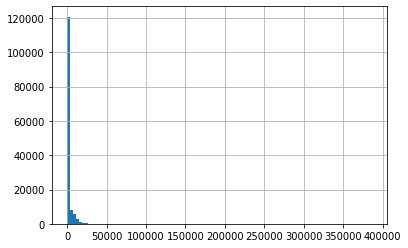

In [256]:
bdinfo_df['연면적(㎡)'].hist(bins=100)

In [257]:
max_df = bdinfo_df[bdinfo_df['연면적(㎡)'] == bdinfo_df['연면적(㎡)'].max()]
max_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
106630,집합,표제부,서울특별시 양천구 목동 916번지,916,0,0,NaN,24367.7,14410.07,59.14,385944.25,199219.77,817.56,철골철근콘크리트구조,"철골철근콘크리트구조,철골조,철근콘크리트구조",공동주택,공동주택(아파트)외6,(철근)콘크리트,평스라브,885,0,69,6,0,0,0,0.0,385944.25,0,0,3042,0,19970516.0,19970529.0,20030721.0,1997.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20200304,서울특별시 양천구 목동 916-0,2020,주거용,주거용,일반아파트


In [258]:
min_df = bdinfo_df[bdinfo_df['연면적(㎡)'] == bdinfo_df['연면적(㎡)'].min()]
min_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
37590,일반,일반건축물,서울특별시 광진구 구의동 199-18번지,199,18,1,NaN,0.0,2.64,0.0,2.64,2.64,0.0,벽돌구조,연와조,단독주택,주택,(철근)콘크리트,스라브,0,1,1,0,0,0,0,0.0,2.64,0,0,0,0,NaN,NaN,19820913.0,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20200427,서울특별시 광진구 구의동 199-18,2020,주거용,주거용,주택unknown


In [259]:
bdinfo_df.isna().sum()

대장_구분                  0
대장_종류                  0
대지_위치                  0
번                      0
지                      0
외필지_수                  0
동_명                98331
대지_면적(㎡)               0
건축_면적(㎡)               0
건폐_율(%)                0
연면적(㎡)                 0
용적_률_산정_연면적(㎡)         0
용적_률(%)                0
구조                     0
기타_구조                 55
주_용도                   0
기타_용도                  0
지붕                    37
기타_지붕                 84
세대_수(세대)               0
가구_수(가구)               0
지상_층_수                 0
지하_층_수                 0
승용_승강기_수               0
비상용_승강기_수              0
부속_건축물_수               0
부속_건축물_면적(㎡)           0
총_동_연면적(㎡)             0
옥내_기계식_대수(대)           0
옥외_기계식_대수(대)           0
옥내_자주식_대수(대)           0
옥외_자주식_대수(대)           0
허가_일               11125
착공_일               29919
사용승인_일               433
허가번호_년             10737
허가번호_기관            76489
허가번호_구분            73410
호_수(호)                 0
에너지효율_등급          136305


In [260]:
bdinfo_df['구조'].value_counts()

철근콘크리트구조       115509
벽돌구조            22657
일반목구조             460
블록구조              308
철골철근콘크리트구조        264
철골콘크리트구조          101
일반철골구조             68
기타조적구조             62
프리케스트콘크리트구조        52
경량철골구조             51
기타콘크리트구조           17
석구조                 6
기타구조                6
기타강구조               4
라멘조                 1
조립식판넬조              1
Name: 구조, dtype: int64

In [261]:
bdinfo_df['기타_구조'].nunique()

1754

In [262]:
bdinfo_df['기타_구조'].value_counts()[:50]

철근콘크리트구조                   70507
철근콘크리트조                    28646
연와조                        18759
철근콘크리트조, 연와조                3067
철근콘크리트                      2160
철근콘크리트벽식구조                  1939
철근콘크리트벽식조                   1067
철근콘크리트구조,연와조                1062
세멘벽돌조                       1031
철근콘크리트벽식                     582
목조                           416
철근콘크리트라멘조                    361
조적조                          336
철근콘크리트조및연와조                  283
시멘트벽돌조                       274
철근콘크리트조, 조적조                 268
철근콘크리트구조, 경량철골구조             266
연와조, 철근콘크리트조                 263
벽돌조                          237
철근콘크리트, 연와조                  197
철근콘크리트 벽식조                   196
철근콘크리트조, 세멘벽돌조               175
철근콘크리트조,                     166
철골철근콘크리트구조                   161
철근콘크리트 벽식구조                  159
R.C조                         145
벽돌구조                         134
철근콘크리트구조, 연와조                123
R.C조, 연와조                    116
철근콘크리트구조,경량철골구조              112
철근콘크리트조,연와

<AxesSubplot:>

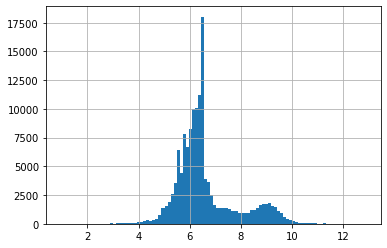

In [264]:
bdinfo_df['연면적(㎡)'].apply(np.log).hist(bins=100)

In [274]:
np.random.rand(100)

array([0.31344056, 0.75448735, 0.69690139, 0.73543236, 0.52300735,
       0.75001282, 0.83641811, 0.06634291, 0.87236412, 0.18477283,
       0.61235279, 0.73258675, 0.99212232, 0.35661708, 0.80215859,
       0.49525767, 0.85264329, 0.72278569, 0.41717963, 0.60861219,
       0.11370312, 0.15513482, 0.01164681, 0.56937253, 0.9581794 ,
       0.15981535, 0.02406825, 0.06165571, 0.44318785, 0.64205551,
       0.48915117, 0.55120783, 0.84732765, 0.8127148 , 0.02358349,
       0.24824124, 0.09615086, 0.74990531, 0.07050613, 0.04364817,
       0.46372123, 0.81366988, 0.84595316, 0.29602348, 0.16570553,
       0.56702655, 0.94133514, 0.08979809, 0.94749914, 0.33881287,
       0.62899097, 0.72896478, 0.12423444, 0.21853427, 0.92456323,
       0.28884749, 0.41620763, 0.97870576, 0.76954008, 0.76808523,
       0.16265182, 0.94498836, 0.15611649, 0.5830612 , 0.70141267,
       0.46541221, 0.43659535, 0.37733725, 0.88638983, 0.83794763,
       0.89634629, 0.40502989, 0.06528401, 0.5105126 , 0.54781

<AxesSubplot:>

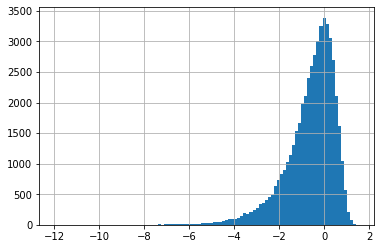

In [298]:
pd.Series(np.random.normal(size=100000)).apply(lambda x: np.log(x)).hist(bins=100)

In [303]:
bdinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139567 entries, 0 to 139723
Data columns (total 52 columns):
대장_구분             139567 non-null object
대장_종류             139567 non-null object
대지_위치             139567 non-null object
번                 139567 non-null int64
지                 139567 non-null int64
외필지_수             139567 non-null int64
동_명               41236 non-null object
대지_면적(㎡)          139567 non-null float64
건축_면적(㎡)          139567 non-null float64
건폐_율(%)           139567 non-null float64
연면적(㎡)            139567 non-null float64
용적_률_산정_연면적(㎡)    139567 non-null float64
용적_률(%)           139567 non-null float64
구조                139567 non-null object
기타_구조             139512 non-null object
주_용도              139567 non-null object
기타_용도             139567 non-null object
지붕                139530 non-null object
기타_지붕             139483 non-null object
세대_수(세대)          139567 non-null int64
가구_수(가구)          139567 non-null int64
지상_층_수            139567 non

In [300]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0,9,3,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트


In [301]:
bdinfo_df['대장_구분'].value_counts()

집합    129684
일반      9883
Name: 대장_구분, dtype: int64

In [302]:
bdinfo_df['대장_종류'].value_counts()

표제부      129684
일반건축물      9883
Name: 대장_종류, dtype: int64

In [304]:
bdinfo_df['세대가구호_수'] = bdinfo_df['세대_수(세대)'] + bdinfo_df['가구_수(가구)'] + bdinfo_df['호_수(호)']

In [305]:
bdinfo_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,세대가구호_수
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown,20
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown,20
2,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20171219,서울특별시 강남구 개포동 1164-0,2017,주거용,주거용,도시형다세대,11
3,집합,표제부,서울특별시 강남구 개포동 1164번지,1164,0,0,NaN,325.5,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택(도시형생활주택-단지형),(철근)콘크리트,(철근)콘크리트,10,0,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,건축과,신축허가,1,NaN,0.0,79,NaN,0,NaN,0,20181122,서울특별시 강남구 개포동 1164-0,2018,주거용,주거용,도시형다세대,11
4,집합,표제부,서울특별시 강남구 개포동 1164-12번지,1164,12,0,NaN,330.3,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,철근콘크리트조,공동주택,아파트,(철근)콘크리트,경사슬라브,12,0,7,1,0,0,0,0.0,1360.02,0,0,9,3,20000321.0,20000324.0,20000923.0,2000.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 개포동 1164-12,2019,주거용,주거용,일반아파트,12


In [315]:
def correct_energy_efficiency_rating(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        try:
            return str(int(float(x)))
        except:
            return x

In [318]:
bdinfo_df['에너지효율_등급'] = bdinfo_df['에너지효율_등급'].apply(correct_energy_efficiency_rating)

In [319]:
bdinfo_df['에너지효율_등급'].value_counts()

1       1724
2       1342
1+       113
3         36
1++       21
1+++      16
5          6
4          4
Name: 에너지효율_등급, dtype: int64

In [321]:
ratings = ['1+++','1++','1+','1','2','3','4','5','6','7']

In [322]:
energy_efficiency_rating_map_df = pd.DataFrame({'rating':ratings, 'map':[i for i in range(len(ratings))]})
energy_efficiency_rating_map_df.to_csv('./feature_maps/energy_efficiency_rating_map.csv', index=False)

In [323]:
bdinfo_df.isna().sum()

대장_구분                  0
대장_종류                  0
대지_위치                  0
번                      0
지                      0
외필지_수                  0
동_명                98331
대지_면적(㎡)               0
건축_면적(㎡)               0
건폐_율(%)                0
연면적(㎡)                 0
용적_률_산정_연면적(㎡)         0
용적_률(%)                0
구조                     0
기타_구조                 55
주_용도                   0
기타_용도                  0
지붕                    37
기타_지붕                 84
세대_수(세대)               0
가구_수(가구)               0
지상_층_수                 0
지하_층_수                 0
승용_승강기_수               0
비상용_승강기_수              0
부속_건축물_수               0
부속_건축물_면적(㎡)           0
총_동_연면적(㎡)             0
옥내_기계식_대수(대)           0
옥외_기계식_대수(대)           0
옥내_자주식_대수(대)           0
옥외_자주식_대수(대)           0
허가_일               11125
착공_일               29919
사용승인_일               433
허가번호_년             10737
허가번호_기관            76489
허가번호_구분            73410
호_수(호)                 0
에너지효율_등급          136305


In [324]:
bdinfo_df['에너지절감_율'].describe()

count    139567.000000
mean          0.559220
std           7.736387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         300.000000
Name: 에너지절감_율, dtype: float64

In [326]:
bdinfo_df['에너지_EPI점수'].describe()

count    139567.000000
mean          2.339034
std          13.318301
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         667.000000
Name: 에너지_EPI점수, dtype: float64

<AxesSubplot:>

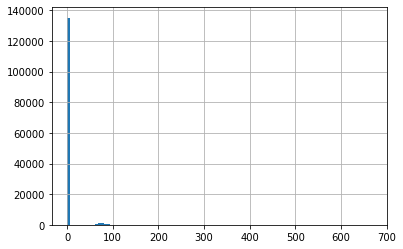

In [327]:
bdinfo_df['에너지_EPI점수'].hist(bins=100)

In [328]:
bdinfo_df['친환경_건축물_인증점수'].describe()

count    139567.000000
mean          0.348764
std           4.975639
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          88.000000
Name: 친환경_건축물_인증점수, dtype: float64

In [331]:
bdinfo_df['외필지_수'].describe()

count    139567.000000
mean          0.298344
std           0.937816
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: 외필지_수, dtype: float64

<AxesSubplot:>

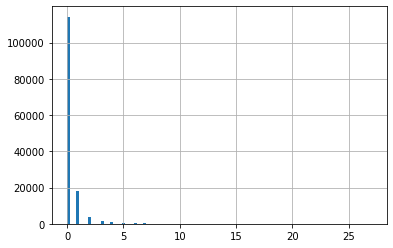

In [332]:
bdinfo_df['외필지_수'].hist(bins=100)

In [333]:
bdinfo_df['외필지_수'].value_counts()

0     114268
1      17964
2       3736
3       1739
4        804
5        360
6        251
7        172
8         78
9         45
10        37
11        32
12        21
27        15
25        13
17         9
13         8
16         5
14         3
20         3
26         1
18         1
21         1
23         1
Name: 외필지_수, dtype: int64

In [346]:
bdinfo_df['지능형_건축물_등급'].describe()

count    2.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: 지능형_건축물_등급, dtype: float64

In [347]:
bdinfo_df['지능형_건축물_등급'].value_counts()

1.0    2
Name: 지능형_건축물_등급, dtype: int64

In [348]:
bdinfo_df['지능형_건축물_인증점수'].describe()

count    139567.000000
mean          0.000502
std           0.187373
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          70.000000
Name: 지능형_건축물_인증점수, dtype: float64

In [350]:
bdinfo_df['지능형_건축물_인증점수'].value_counts()

0     139566
70         1
Name: 지능형_건축물_인증점수, dtype: int64

In [351]:
cols_to_drop = ['대장_종류', '대지_위치', '번', '지', '동_명', '대지_면적(㎡)', '기타_구조', '기타_용도', '기타_지붕',
                '세대_수(세대)', '가구_수(가구)', '호_수(호)', '허가번호_기관', '허가번호_구분', '에너지효율_등급', '에너지절감_율',
                '에너지_EPI점수', '친환경_건축물_등급', '친환경_건축물_인증점수', '주용도_주거용여부', '기타용도_주거용여부',
                '지능형_건축물_등급', '지능형_건축물_인증점수'
               ]

In [352]:
simple_df = bdinfo_df.drop(columns=cols_to_drop)
print(simple_df.shape)
simple_df.head()

(139567, 30)


,대장_구분,외필지_수,건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,생성_일자,주소,생성년도,기타용도_주택종류,세대가구호_수
0,집합,0,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,공동주택,(철근)콘크리트,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,20171118,서울특별시 강남구 개포동 1163-4,2017,도시형unknown,20
1,집합,0,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,종교시설,(철근)콘크리트,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,20190813,서울특별시 강남구 개포동 1163-4,2019,도시형unknown,20
2,집합,0,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,공동주택,(철근)콘크리트,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,20171219,서울특별시 강남구 개포동 1164-0,2017,도시형다세대,11
3,집합,0,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,공동주택,(철근)콘크리트,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,20181122,서울특별시 강남구 개포동 1164-0,2018,도시형다세대,11
4,집합,0,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,공동주택,(철근)콘크리트,7,1,0,0,0,0.0,1360.02,0,0,9,3,20000321.0,20000324.0,20000923.0,2000.0,20190530,서울특별시 강남구 개포동 1164-12,2019,일반아파트,12


In [354]:
simple_df.isna().sum()

대장_구분                 0
외필지_수                 0
건축_면적(㎡)              0
건폐_율(%)               0
연면적(㎡)                0
용적_률_산정_연면적(㎡)        0
용적_률(%)               0
구조                    0
주_용도                  0
지붕                   37
지상_층_수                0
지하_층_수                0
승용_승강기_수              0
비상용_승강기_수             0
부속_건축물_수              0
부속_건축물_면적(㎡)          0
총_동_연면적(㎡)            0
옥내_기계식_대수(대)          0
옥외_기계식_대수(대)          0
옥내_자주식_대수(대)          0
옥외_자주식_대수(대)          0
허가_일              11125
착공_일              29919
사용승인_일              433
허가번호_년            10737
생성_일자                 0
주소                    0
생성년도                  0
기타용도_주택종류             0
세대가구호_수               0
dtype: int64

In [355]:
no_roof_df = bdinfo_df[bdinfo_df['지붕'].isna()]
no_roof_df.shape

(37, 53)

In [356]:
no_roof_df

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류,세대가구호_수
1679,집합,표제부,서울특별시 강남구 논현동 270-6번지,270,6,0,블루하우스(Blue house),161.30,94.9000,58.8300,322.1700,322.1700,199.7300,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택 (다세대 7세대),NaN,철근콘크리트평스라브,7,0,5,0,0,0,0,0.0,322.1700,0,0,0,4,20120208.0,20120412.0,20121030.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 논현동 270-6,2019,주거용,주거용,일반다세대,7
2653,집합,표제부,서울특별시 강남구 대치동 955-8번지,955,8,0,NaN,242.10,143.6400,59.3300,660.6600,526.6800,217.5500,철근콘크리트구조,철근콘크리트구조,공동주택,"근린생활시설, 공동주택",NaN,NaN,19,0,6,1,0,0,0,0.0,660.6600,0,0,0,8,20071004.0,20080326.0,20080908.0,2007.0,건축과,신축허가,3,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 대치동 955-8,2019,주거용,주거용,공동주택,22
3581,집합,표제부,서울특별시 강남구 삼성동 36-16번지,36,16,0,NaN,251.50,148.4900,59.0400,778.3200,489.8900,194.7900,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택,NaN,평지붕,9,0,4,2,1,0,0,0.0,778.3200,0,0,0,8,20100308.0,20100326.0,20110125.0,2010.0,건축과,신축허가,2,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 삼성동 36-16,2019,주거용,주거용,공동주택,11
3851,집합,표제부,서울특별시 강남구 삼성동 92-9번지,92,9,0,NaN,243.00,144.7600,59.5700,531.1800,531.1800,218.5900,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택,NaN,평스라브,13,0,5,0,1,0,0,0.0,531.1800,0,0,6,1,20110331.0,20110408.0,20111019.0,2011.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 삼성동 92-9,2019,주거용,주거용,일반다세대,13
4890,집합,표제부,서울특별시 강남구 역삼동 664-16번지,664,16,0,NaN,182.60,108.2600,59.2900,407.0400,407.0400,222.9100,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택,NaN,NaN,8,0,5,0,0,0,0,0.0,407.0400,0,0,3,2,20091230.0,20100118.0,20100518.0,2009.0,건축과,신축허가,1,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 역삼동 664-16,2019,주거용,주거용,일반다세대,9
11564,집합,표제부,서울특별시 강동구 암사동 445-18번지,445,18,0,NaN,175.90,104.9400,59.6600,400.9200,400.9200,227.9200,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택,NaN,NaN,7,0,5,0,0,0,0,0.0,400.9200,0,0,3,2,20120323.0,20120330.0,20120724.0,2012.0,건축과,신축허가,1,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 강동구 암사동 445-18,2017,주거용,주거용,일반다세대,8
27508,집합,표제부,서울특별시 강서구 화곡동 394-25번지,394,25,0,NaN,165.30,97.9200,59.2400,309.0200,309.0200,186.9400,철근콘크리트구조,철근콘크리트구조,공동주택,제2종근린생활시설 및 다세대주택(8세대),NaN,평스라브,8,0,5,0,0,0,0,0.0,309.0200,0,0,1,3,20100330.0,20110420.0,20110816.0,2010.0,건축과,신축허가,1,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강서구 화곡동 394-25,2019,주거용,주거용,일반다세대,9
30295,집합,표제부,서울특별시 강서구 화곡동 920-16번지,920,16,0,NaN,318.30,188.2600,59.1500,2278.1300,1904.9700,598.4800,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택,NaN,철근콘크리트,46,0,13,2,1,0,0,0.0,2278.1300,17,0,1,1,20110729.0,20110902.0,20120925.0,2011.0,건축과,신축허가,24,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강서구 화곡동 920-16,2019,주거용,주거용,공동주택,70
32076,집합,표제부,서울특별시 관악구 봉천동 1688-82번지,1688,82,0,NaN,0.00,163.4200,0.0000,659.0400,326.8400,0.0000,벽돌구조,연와조,공동주택,다세대주택(6세대),NaN,아스팔트싱글,6,0,2,2,0,0,0,0.0,659.0400,0,0,0,0,19901211.0,NaN,19910706.0,1990.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 관악구 봉천동 1688-82,2017,주거용,주거용,일반다세대,6
32105,집합,표제부,서울특별시 관악구 봉천동 1690-65번지,1690,65,0,NaN,240.00,142.5600,59.4000,659.3500,0.0000,215.2800,철근콘크리트구조,철근콘크리트조,공동주택,다세대주택,NaN,아스팔트싱글,8,0,4,1,0,0,0,0.0,659.3500,0,0,4,0,19930430.0,19930527.0,19931104.0,1993.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171205,서울특별시 관악구 봉천동 1690-65,2017,주거용,주거용,일반다세대,8


In [358]:
bdinfo_df['지붕'].value_counts()

(철근)콘크리트    130416
기타지붕          5818
기와            3103
슬레이트           193
Name: 지붕, dtype: int64

In [359]:
simple_df['지붕'].fillna('(철근)콘크리트', inplace=True)

In [360]:
simple_df.isna().sum()

대장_구분                 0
외필지_수                 0
건축_면적(㎡)              0
건폐_율(%)               0
연면적(㎡)                0
용적_률_산정_연면적(㎡)        0
용적_률(%)               0
구조                    0
주_용도                  0
지붕                    0
지상_층_수                0
지하_층_수                0
승용_승강기_수              0
비상용_승강기_수             0
부속_건축물_수              0
부속_건축물_면적(㎡)          0
총_동_연면적(㎡)            0
옥내_기계식_대수(대)          0
옥외_기계식_대수(대)          0
옥내_자주식_대수(대)          0
옥외_자주식_대수(대)          0
허가_일              11125
착공_일              29919
사용승인_일              433
허가번호_년            10737
생성_일자                 0
주소                    0
생성년도                  0
기타용도_주택종류             0
세대가구호_수               0
dtype: int64

In [361]:
cat_cols = ['대장_구분', '구조', '주_용도', '지붕', '기타용도_주택종류']
for col in cat_cols:
    map_df = pd.DataFrame({'category':simple_df[col].unique(), 'map':[i for i in range(len(simple_df[col].unique()))]})
    map_df.to_csv('./feature_maps/{}_map.csv'.format(col), index=False)
    col_map = {}
    for i in range(map_df.shape[0]):
        col_map[map_df['category'][i]] = map_df['map'][i]
    
    simple_df[col+'_mapped'] = simple_df[col].map(col_map)

In [362]:
simple_df.head()

,대장_구분,외필지_수,건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,주_용도,지붕,지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,생성_일자,주소,생성년도,기타용도_주택종류,세대가구호_수,대장_구분_mapped,구조_mapped,주_용도_mapped,지붕_mapped,기타용도_주택종류_mapped
0,집합,0,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,공동주택,(철근)콘크리트,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,20171118,서울특별시 강남구 개포동 1163-4,2017,도시형unknown,20,0,0,0,0,0
1,집합,0,167.78,49.920000,1102.75,839.39,249.74,철근콘크리트구조,종교시설,(철근)콘크리트,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,20190813,서울특별시 강남구 개포동 1163-4,2019,도시형unknown,20,0,0,1,0,0
2,집합,0,185.07,56.860000,827.86,650.00,199.69,철근콘크리트구조,공동주택,(철근)콘크리트,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,20171219,서울특별시 강남구 개포동 1164-0,2017,도시형다세대,11,0,0,0,0,1
3,집합,0,185.07,56.857142,827.86,650.00,199.69,철근콘크리트구조,공동주택,(철근)콘크리트,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,20181122,서울특별시 강남구 개포동 1164-0,2018,도시형다세대,11,0,0,0,0,1
4,집합,0,166.01,50.260000,1360.02,1126.75,341.13,철근콘크리트구조,공동주택,(철근)콘크리트,7,1,0,0,0,0.0,1360.02,0,0,9,3,20000321.0,20000324.0,20000923.0,2000.0,20190530,서울특별시 강남구 개포동 1164-12,2019,일반아파트,12,0,0,0,0,2


In [368]:
simple_df.drop(columns=cat_cols, inplace=True)

In [369]:
simple_df.head()

,외필지_수,건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,생성_일자,주소,생성년도,세대가구호_수,대장_구분_mapped,구조_mapped,주_용도_mapped,지붕_mapped,기타용도_주택종류_mapped
0,0,167.78,49.920000,1102.75,839.39,249.74,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,20171118,서울특별시 강남구 개포동 1163-4,2017,20,0,0,0,0,0
1,0,167.78,49.920000,1102.75,839.39,249.74,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,20190813,서울특별시 강남구 개포동 1163-4,2019,20,0,0,1,0,0
2,0,185.07,56.860000,827.86,650.00,199.69,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,20171219,서울특별시 강남구 개포동 1164-0,2017,11,0,0,0,0,1
3,0,185.07,56.857142,827.86,650.00,199.69,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,20181122,서울특별시 강남구 개포동 1164-0,2018,11,0,0,0,0,1
4,0,166.01,50.260000,1360.02,1126.75,341.13,7,1,0,0,0,0.0,1360.02,0,0,9,3,20000321.0,20000324.0,20000923.0,2000.0,20190530,서울특별시 강남구 개포동 1164-12,2019,12,0,0,0,0,2


In [370]:
no_allowed_df = simple_df[simple_df['사용승인_일'].isna()]
no_allowed_df.shape

(433, 30)

In [371]:
no_allowed_df

,외필지_수,건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,생성_일자,주소,생성년도,세대가구호_수,대장_구분_mapped,구조_mapped,주_용도_mapped,지붕_mapped,기타용도_주택종류_mapped
250,0,72.730,0.0000,72.730,72.73,0.0000,1,0,0,0,0,0.00,72.730,0,0,0,0,NaN,NaN,NaN,NaN,20200427,서울특별시 강남구 개포동 1210-6,2020,1,1,5,3,1,7
672,0,36.360,0.0000,36.360,36.36,0.0000,1,0,0,0,0,0.00,36.360,0,0,0,0,NaN,NaN,NaN,NaN,20171206,서울특별시 강남구 개포동 187-0,2017,1,1,5,3,1,7
673,0,13.220,0.0000,13.220,13.22,0.0000,1,0,0,0,0,0.00,13.220,0,0,0,0,NaN,NaN,NaN,NaN,20190522,서울특별시 강남구 개포동 187-0,2019,1,1,5,3,1,7
674,0,42.980,0.0000,42.980,42.98,0.0000,1,0,0,0,0,0.00,42.980,0,0,0,0,NaN,NaN,NaN,NaN,20190522,서울특별시 강남구 개포동 187-0,2019,1,1,5,3,1,7
2697,1,82.640,0.0000,82.640,82.64,0.0000,1,0,0,0,1,46.28,82.640,0,0,0,0,NaN,NaN,NaN,NaN,20170316,서울특별시 강남구 대치동 965-18,2017,1,1,5,3,2,7
2764,0,26.450,0.0000,26.450,26.45,0.0000,1,0,0,0,0,0.00,26.450,0,0,0,0,NaN,NaN,NaN,NaN,20170316,서울특별시 강남구 대치동 973-30,2017,1,1,5,3,1,7
2768,0,19.830,0.0000,19.830,19.83,0.0000,1,0,0,0,0,0.00,19.830,0,0,0,0,NaN,NaN,NaN,NaN,20170316,서울특별시 강남구 대치동 973-4,2017,1,1,5,3,1,7
4590,0,56.200,0.0000,56.200,56.20,0.0000,1,0,0,0,0,0.00,56.200,0,0,0,0,NaN,NaN,NaN,NaN,20171206,서울특별시 강남구 압구정동 434-0,2017,1,1,5,3,2,7
7503,0,29.750,0.0000,29.750,29.75,0.0000,1,0,0,0,0,0.00,29.750,0,0,0,0,NaN,NaN,NaN,NaN,20200428,서울특별시 강동구 고덕동 538-0,2020,1,1,5,3,1,4
8446,0,29.750,0.0000,29.750,29.75,0.0000,1,0,0,0,0,0.00,29.750,0,0,0,0,NaN,NaN,NaN,NaN,20171205,서울특별시 강동구 길동 92-0,2017,1,1,5,3,1,4


In [374]:
simple_df['사용승인_일'].fillna(2006, inplace=True)

In [375]:
simple_df['사용승인_년'] = simple_df['사용승인_일'].apply(lambda x: str(x)[:4]).apply(int)
simple_df.head()

,외필지_수,건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,생성_일자,주소,생성년도,세대가구호_수,대장_구분_mapped,구조_mapped,주_용도_mapped,지붕_mapped,기타용도_주택종류_mapped,사용승인_년
0,0,167.78,49.920000,1102.75,839.39,249.74,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,20171118,서울특별시 강남구 개포동 1163-4,2017,20,0,0,0,0,0,2013
1,0,167.78,49.920000,1102.75,839.39,249.74,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,20190813,서울특별시 강남구 개포동 1163-4,2019,20,0,0,1,0,0,2013
2,0,185.07,56.860000,827.86,650.00,199.69,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,20171219,서울특별시 강남구 개포동 1164-0,2017,11,0,0,0,0,1,2017
3,0,185.07,56.857142,827.86,650.00,199.69,5,1,1,0,0,0.0,827.86,0,0,8,0,20170315.0,20170321.0,20171107.0,2017.0,20181122,서울특별시 강남구 개포동 1164-0,2018,11,0,0,0,0,1,2017
4,0,166.01,50.260000,1360.02,1126.75,341.13,7,1,0,0,0,0.0,1360.02,0,0,9,3,20000321.0,20000324.0,20000923.0,2000.0,20190530,서울특별시 강남구 개포동 1164-12,2019,12,0,0,0,0,2,2000


In [376]:
simple_df.drop(columns=['허가_일', '착공_일', '사용승인_일', '허가번호_년', '생성_일자'], inplace=True)

In [377]:
simple_df.head()

,외필지_수,건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),주소,생성년도,세대가구호_수,대장_구분_mapped,구조_mapped,주_용도_mapped,지붕_mapped,기타용도_주택종류_mapped,사용승인_년
0,0,167.78,49.920000,1102.75,839.39,249.74,7,1,1,0,0,0.0,1102.75,0,0,9,0,서울특별시 강남구 개포동 1163-4,2017,20,0,0,0,0,0,2013
1,0,167.78,49.920000,1102.75,839.39,249.74,7,1,1,0,0,0.0,1102.75,0,0,9,0,서울특별시 강남구 개포동 1163-4,2019,20,0,0,1,0,0,2013
2,0,185.07,56.860000,827.86,650.00,199.69,5,1,1,0,0,0.0,827.86,0,0,8,0,서울특별시 강남구 개포동 1164-0,2017,11,0,0,0,0,1,2017
3,0,185.07,56.857142,827.86,650.00,199.69,5,1,1,0,0,0.0,827.86,0,0,8,0,서울특별시 강남구 개포동 1164-0,2018,11,0,0,0,0,1,2017
4,0,166.01,50.260000,1360.02,1126.75,341.13,7,1,0,0,0,0.0,1360.02,0,0,9,3,서울특별시 강남구 개포동 1164-12,2019,12,0,0,0,0,2,2000


In [378]:
simple_df.shape

(139567, 26)

In [380]:
simple_df['주소'].nunique()

103583

In [383]:
simple_df.rename(columns={'주소':'지번주소'}, inplace=True)

In [385]:
simple_df['생성년도'].unique().max()

2020

In [386]:
for i in range(2020, 2021):
    print(i)

2020


In [387]:
simple_df.isna().sum()

외필지_수               0
건축_면적(㎡)            0
건폐_율(%)             0
연면적(㎡)              0
용적_률_산정_연면적(㎡)      0
용적_률(%)             0
지상_층_수              0
지하_층_수              0
승용_승강기_수            0
비상용_승강기_수           0
부속_건축물_수            0
부속_건축물_면적(㎡)        0
총_동_연면적(㎡)          0
옥내_기계식_대수(대)        0
옥외_기계식_대수(대)        0
옥내_자주식_대수(대)        0
옥외_자주식_대수(대)        0
지번주소                0
생성년도                0
세대가구호_수             0
대장_구분_mapped        0
구조_mapped           0
주_용도_mapped         0
지붕_mapped           0
기타용도_주택종류_mapped    0
사용승인_년              0
dtype: int64

In [390]:
pd.DataFrame({'col1':[1,2,3], 'col2':2, 'col3':})

ValueError: arrays must all be same length

In [405]:
sorted(simple_df['생성년도'].unique().tolist())

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [423]:
cols = simple_df.columns.tolist()
cols.remove('지번주소')
cols.remove('생성년도')
cols.remove('사용승인_년')
cols = ['지번주소', '생성년도', '사용승인_년'] + cols
simple_df = simple_df[cols]

In [424]:
simple_df.head()

,지번주소,생성년도,사용승인_년,외필지_수,건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),세대가구호_수,대장_구분_mapped,구조_mapped,주_용도_mapped,지붕_mapped,기타용도_주택종류_mapped
0,서울특별시 강남구 개포동 1163-4,2017,2013,0,167.78,49.920000,1102.75,839.39,249.74,7,1,1,0,0,0.0,1102.75,0,0,9,0,20,0,0,0,0,0
1,서울특별시 강남구 개포동 1163-4,2019,2013,0,167.78,49.920000,1102.75,839.39,249.74,7,1,1,0,0,0.0,1102.75,0,0,9,0,20,0,0,1,0,0
2,서울특별시 강남구 개포동 1164-0,2017,2017,0,185.07,56.860000,827.86,650.00,199.69,5,1,1,0,0,0.0,827.86,0,0,8,0,11,0,0,0,0,1
3,서울특별시 강남구 개포동 1164-0,2018,2017,0,185.07,56.857142,827.86,650.00,199.69,5,1,1,0,0,0.0,827.86,0,0,8,0,11,0,0,0,0,1
4,서울특별시 강남구 개포동 1164-12,2019,2000,0,166.01,50.260000,1360.02,1126.75,341.13,7,1,0,0,0,0.0,1360.02,0,0,9,3,12,0,0,0,0,2


In [448]:
simple_df['생성년도'].describe()

count    139567.000000
mean       2017.755773
std           2.221323
min        2009.000000
25%        2017.000000
50%        2018.000000
75%        2019.000000
max        2020.000000
Name: 생성년도, dtype: float64

In [449]:
simple_df.drop(columns=['건물나이'], inplace=True)

In [450]:
simple_df['사용승인_년'].describe()

count    139567.000000
mean       2001.096470
std          12.006103
min        1111.000000
25%        1993.000000
50%        2002.000000
75%        2011.000000
max        2020.000000
Name: 사용승인_년, dtype: float64

In [457]:
prac_list = [1,2,3,4,5]

In [459]:
prac_list[4]

5

In [460]:
for i, v in enumerate(prac_list):
    if prac_list[i+1] == 2006:
        print(i)

IndexError: list index out of range

In [464]:
prac_list = [2000, 2001, 2004, 2005, 2006]

In [465]:
for v in prac_list:
    if (v < 2006) & (max(prac_list) >= 2006):
        continue
    else:
        print(v)

2006


In [544]:
for i in range(0,0):
    print(i)

In [636]:
def create_complete_bdinfo_df_iteratively(df):
    import numpy as np
    import pandas as pd
    import gc
    
    df = df.copy()
    
    dfs_list = []
    count = 0
    for addr in df['지번주소'].unique():
        if (count%10000) == 0:
            gc.collect()
        
        all_years = [i for i in range(2006, 2021)]
        
        addr_df = df[df['지번주소'] == addr].reset_index(drop=True)
        unique_allowed_years = sorted(addr_df['사용승인_년'].unique())        
        
        for i, y in enumerate(unique_allowed_years):
            allowed_year_df = addr_df[addr_df['사용승인_년'] == y]
            year_milestones = allowed_year_df['생성년도'].unique()
            
            if (len(unique_allowed_years) == 1):
                if y <= 2006:
                    min_year = 2006
                else:
                    min_year = y
            else:
                try:
                    if (y < 2006) & (unique_allowed_years[i+1] <= 2006):
                        continue
                    else:
                        if y < 2006:
                            min_year = 2006
                        else:
                            min_year = y
                except:
                    if y < 2006:
                        min_year = 2006
                    else:
                        min_year = y
            
            if i == (len(unique_allowed_years) -1):
                max_year = 2020
            else:
                max_year = unique_allowed_years[i+1] - 1
                        
            
            years_range = [i for i in range(min_year, max_year + 1)]
            
            [years_range.remove(v) for v in year_milestones if v in years_range]
            
            '''if years_range == []:
                print(min_year)
                print(max_year)
                print(unique_allowed_years)
                raise ValueError('empty years range')'''

            temp_dict = {}
            for col in df.columns:
                if col == '지번주소':
                    temp_dict[col] = addr
                elif col == '생성년도':
                    temp_dict[col] = years_range
                else:
                    temp_dict[col] = np.nan
                    
            if len(years_range) == 1:
                add_df = pd.DataFrame(temp_dict, index=[0])
            else:
                add_df = pd.DataFrame(temp_dict)
            
            mini_concat_df = pd.concat([allowed_year_df, add_df]).sort_values(['생성년도']).reset_index(drop=True).fillna(method='ffill')
            
            #if len(unique_allowed_years) > 1:
            
            min_year_row = allowed_year_df.iloc[[0],:]
            
            min_year_rows_list = [min_year_row for i in range(min(year_milestones)-min_year)]
            
            if min_year_rows_list == []:
                dfs_list.append(mini_concat_df)
                continue
            
            min_year_concat_df = pd.concat(min_year_rows_list).reset_index(drop=True)

            mini_concat_df.iloc[:min_year_concat_df.shape[0], 2:] = min_year_concat_df.iloc[:, 2:]

            dfs_list.append(mini_concat_df)

        count += 1

    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    return concat_df

In [637]:
def parallelize(df, func, num_processors=6):
    #data_split = np.array_split(data, num_processors)
    
    data_split = []
    unique_addrs = df['지번주소'].unique()
    divided = int(len(unique_addrs) / num_processors)
    for i in range(num_processors):
        if i < (num_processors - 1):
            picked_addrs = unique_addrs[divided*i:divided*(i+1)]
        else:
            picked_addrs = unique_addrs[divided*i:]
        data_split.append(df[df['지번주소'].isin(picked_addrs)])
            
    pool = mp.Pool(num_processors)
    concat_df = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return concat_df

In [638]:
%%time
completed_df = parallelize(simple_df, create_complete_bdinfo_df_iteratively)
print(completed_df.shape)
completed_df.head()

(1402204, 26)
Wall time: 4min 51s


,지번주소,생성년도,사용승인_년,외필지_수,건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),세대가구호_수,대장_구분_mapped,구조_mapped,주_용도_mapped,지붕_mapped,기타용도_주택종류_mapped
0,서울특별시 강남구 개포동 1163-4,2013.0,2013.0,0.0,167.78,49.92,1102.75,839.39,249.74,7.0,1.0,1.0,0.0,0.0,0.0,1102.75,0.0,0.0,9.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0
1,서울특별시 강남구 개포동 1163-4,2014.0,2013.0,0.0,167.78,49.92,1102.75,839.39,249.74,7.0,1.0,1.0,0.0,0.0,0.0,1102.75,0.0,0.0,9.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0
2,서울특별시 강남구 개포동 1163-4,2015.0,2013.0,0.0,167.78,49.92,1102.75,839.39,249.74,7.0,1.0,1.0,0.0,0.0,0.0,1102.75,0.0,0.0,9.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0
3,서울특별시 강남구 개포동 1163-4,2016.0,2013.0,0.0,167.78,49.92,1102.75,839.39,249.74,7.0,1.0,1.0,0.0,0.0,0.0,1102.75,0.0,0.0,9.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0
4,서울특별시 강남구 개포동 1163-4,2017.0,2013.0,0.0,167.78,49.92,1102.75,839.39,249.74,7.0,1.0,1.0,0.0,0.0,0.0,1102.75,0.0,0.0,9.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0


In [639]:
%%time
completed_df.to_csv('./prepped_data/bdinfo_ver_1.csv', index=False)

Wall time: 19.3 s


In [263]:
bdinfo_df.shape

(139567, 52)

In [224]:
subset_cols = bdinfo_df.columns.tolist()
subset_cols.remove('생성_일자')
subset_cols.remove('생성년도')
subset_cols.remove('기타_용도')
subset_cols.remove('주용도_주거용여부')
subset_cols.remove('기타용도_주거용여부')
subset_cols.remove('건폐_율(%)')
subset_cols.remove('대지_면적(㎡)')
subset_cols.remove('기타용도_주택종류')
second_subset_cols = ['주소', '연면적(㎡)']
bdinfo_no_dupes_df = bdinfo_df.drop_duplicates(subset=subset_cols, keep='last')
print(bdinfo_no_dupes_df.shape)

(138556, 52)


In [225]:
count = 0
for addr in tqdm(bdinfo_no_dupes_df['주소'].unique()):
    addr_df = bdinfo_no_dupes_df[bdinfo_no_dupes_df['주소'] == addr]
    for dong in addr_df['동_명'].unique():
        dong_df = addr_df[addr_df['동_명'] == dong]
        if (dong_df['건축_면적(㎡)'].nunique() != dong_df['주_용도'].nunique()) | (dong_df['건축_면적(㎡)'].nunique() != dong_df['기타_용도'].nunique()):
            print(dong_df.shape)
            display(dong_df)
            count += 1
    if count > 10:
        break

  0%|                                                                                       | 0/103583 [00:00<?, ?it/s]

(2, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
0,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.92,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),공동주택,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1163-4,2017,주거용,주거용,도시형unknown
1,집합,표제부,서울특별시 강남구 개포동 1163-4번지,1163,4,0,주건축물제1동,336.1,167.78,49.92,1102.75,839.39,249.74,철근콘크리트구조,(벽식구조/철골조),종교시설,"도시형생활주택,종교시설",(철근)콘크리트,(철근)콘크리트,20,0,7,1,1,0,0,0.0,1102.75,0,0,9,0,20120113.0,20120227.0,20130307.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 개포동 1163-4,2019,비주거용,주거용,도시형unknown


  1%|▍                                                                           | 600/103583 [00:04<12:15, 139.98it/s]

(2, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
993,집합,표제부,서울특별시 강남구 논현동 136-39번지,136,39,0,주건축물제1동,264.5,137.48,51.98,439.33,439.33,166.1,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택(원룸형15세대),(철근)콘크리트,(철근)콘크리트,15,0,6,0,1,0,0,0.0,439.33,0,0,6,0,20120613.0,20120630.0,20130128.0,2012.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20130130,서울특별시 강남구 논현동 136-39,2013,주거용,주거용,도시형원룸
994,집합,표제부,서울특별시 강남구 논현동 136-39번지,136,39,0,주건축물제1동,264.5,137.48,51.98,439.33,439.33,166.1,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택,(철근)콘크리트,(철근)콘크리트,14,0,6,0,1,0,0,0.0,439.33,0,0,6,0,20120613.0,20120630.0,20130128.0,2012.0,건축과,신축허가,1,NaN,0.0,0,NaN,0,NaN,0,20200909,서울특별시 강남구 논현동 136-39,2020,주거용,주거용,도시형unknown


  1%|▊                                                                          | 1114/103583 [00:08<12:10, 140.29it/s]

(3, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
1629,집합,표제부,서울특별시 강남구 논현동 265-25번지,265,25,0,주건축물제1동,431.6,251.21,58.200000,1391.12,640.38,148.37000,철근콘크리트구조,철근콘크리트구조,공동주택,"다세대주택,근린생활시설",(철근)콘크리트,(철근)콘크리트,8,0,4,3,1,0,0,0.0,1391.12,0,0,7,5,20150921.0,20151102.0,20170406.0,2015.0,건축과,신축허가,3,NaN,0.0,69,NaN,0,NaN,0,20171206,서울특별시 강남구 논현동 265-25,2017,주거용,주거용,일반다세대
1630,집합,표제부,서울특별시 강남구 논현동 265-25번지,265,25,0,주건축물제1동,431.6,251.21,58.200000,1391.12,640.38,148.37000,철근콘크리트구조,철근콘크리트구조,제2종근린생활시설,"다세대주택,근린생활시설",(철근)콘크리트,(철근)콘크리트,8,0,4,3,1,0,0,0.0,1391.12,0,0,7,5,20150921.0,20151102.0,20170406.0,2015.0,건축과,신축허가,3,NaN,0.0,69,NaN,0,NaN,0,20190813,서울특별시 강남구 논현동 265-25,2019,비주거용,주거용,일반다세대
1631,집합,표제부,서울특별시 강남구 논현동 265-25번지,265,25,0,주건축물제1동,431.6,251.21,58.204355,1417.60,640.38,148.37349,철근콘크리트구조,철근콘크리트구조,제2종근린생활시설,"다세대주택,근린생활시설",(철근)콘크리트,(철근)콘크리트,8,0,4,3,1,0,0,0.0,1417.60,0,0,7,5,20150921.0,20151102.0,20170406.0,2015.0,건축과,신축허가,3,NaN,0.0,69,NaN,0,NaN,0,20200513,서울특별시 강남구 논현동 265-25,2020,비주거용,주거용,일반다세대


  2%|█▋                                                                         | 2364/103583 [00:16<11:53, 141.83it/s]

(2, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
3384,집합,표제부,서울특별시 강남구 삼성동 144-10번지,144,10,1,삼성동 우정에쉐르2,779.2,443.78,56.95,5941.89,4273.71,548.47,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택,(철근)콘크리트,콘크리트평스라브,60,0,13,4,3,0,0,0.0,5941.89,60,0,0,5,20021120.0,20030305.0,20041203.0,2002.0,건축과,신축허가,9,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 삼성동 144-10,2017,주거용,주거용,공동주택
3385,집합,표제부,서울특별시 강남구 삼성동 144-10번지,144,10,1,삼성동 우정에쉐르2,779.2,443.29,56.89,5946.09,4277.91,549.01,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택,(철근)콘크리트,콘크리트평스라브,60,0,13,4,3,0,0,0.0,5946.09,60,0,0,5,20021120.0,20030305.0,20041203.0,2002.0,건축과,신축허가,9,NaN,0.0,0,NaN,0,NaN,0,20201024,서울특별시 강남구 삼성동 144-10,2020,주거용,주거용,공동주택


  3%|██                                                                         | 2883/103583 [00:20<12:00, 139.72it/s]

(2, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
4411,집합,표제부,서울특별시 강남구 신사동 561-25번지,561,25,0,주건축물제1동,304.2,151.39,49.77,769.57,526.89,173.21,철근콘크리트구조,철근콘크리트구조,공동주택,"근린생활시설, 도시형생활주택(18세대)",(철근)콘크리트,(철근)콘크리트,18,0,5,1,1,0,0,0.0,769.57,0,0,0,8,20110804.0,20110819.0,20120517.0,2011.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 신사동 561-25,2019,주거용,주거용,도시형unknown
4412,집합,표제부,서울특별시 강남구 신사동 561-25번지,561,25,0,주건축물제1동,304.2,151.39,49.77,781.55,538.87,177.14,철근콘크리트구조,철근콘크리트구조,제2종근린생활시설,"근린생활시설, 도시형생활주택(15세대)",(철근)콘크리트,(철근)콘크리트,15,0,5,1,1,0,0,0.0,781.55,0,0,0,8,20110804.0,20110819.0,20120517.0,2011.0,건축과,신축허가,3,NaN,0.0,0,NaN,0,NaN,0,20200910,서울특별시 강남구 신사동 561-25,2020,비주거용,주거용,도시형unknown


  3%|██▎                                                                        | 3210/103583 [00:22<11:45, 142.31it/s]

(2, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
4912,집합,표제부,서울특별시 강남구 역삼동 672-30번지,672,30,0,주건축물제1동,244.4,145.28,59.4435,662.0,363.0,148.527,철근콘크리트구조,철근콘크리트구조,공동주택,도시형생활주택(10세대)근린생활시설,(철근)콘크리트,평지붕,10,0,4,2,1,0,0,0.0,662.0,0,0,4,2,20120201.0,20120215.0,20121129.0,2012.0,건축과,신축허가,3,NaN,0.0,0,NaN,0,NaN,0,20170218,서울특별시 강남구 역삼동 672-30,2017,주거용,주거용,도시형unknown
4913,집합,표제부,서울특별시 강남구 역삼동 672-30번지,672,30,0,주건축물제1동,244.4,145.28,59.4435,662.0,363.0,148.527,철근콘크리트구조,철근콘크리트구조,제2종근린생활시설,"도시형생활주택(10세대), 근린생활시설",(철근)콘크리트,평지붕,10,0,4,2,1,0,0,0.0,662.0,0,0,4,2,20120201.0,20120215.0,20121129.0,2012.0,건축과,신축허가,3,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 역삼동 672-30,2019,비주거용,주거용,도시형unknown


  3%|██▌                                                                        | 3479/103583 [00:24<12:11, 136.93it/s]

(2, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
5250,집합,표제부,서울특별시 강남구 역삼동 725-41번지,725,41,1,울프슨빌,387.0,207.03,53.5,805.19,578.19,149.4,철근콘크리트구조,철근콘크리트구조,공동주택,다세대주택/근린생활시설,(철근)콘크리트,(철근)콘크리트평지붕,13,0,4,1,0,0,0,0.0,805.19,0,0,0,15,20011017.0,20011031.0,20021123.0,2001.0,건축과,신축허가,2,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 역삼동 725-41,2017,주거용,주거용,일반다세대
5251,일반,일반건축물,서울특별시 강남구 역삼동 725-41번지,725,41,1,울프슨빌,387.0,207.03,53.5,805.19,578.19,149.4,철근콘크리트구조,철근콘크리트구조,단독주택,다가구주택/근린생활시설,(철근)콘크리트,(철근)콘크리트평지붕,0,13,4,1,0,0,0,0.0,805.19,0,0,0,15,20011017.0,20011031.0,20021123.0,2001.0,건축과,신축허가,2,NaN,0.0,0,NaN,0,NaN,0,20201027,서울특별시 강남구 역삼동 725-41,2020,주거용,주거용,단독주택


  4%|██▉                                                                        | 4057/103583 [00:28<10:45, 154.24it/s]

(2, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
6058,집합,표제부,서울특별시 강남구 일원동 625-5번지,625,5,0,주건축물제1동,192.8,114.96,59.63,508.3,383.67,198.99,철근콘크리트구조,철근콘크리트구조,제2종근린생활시설,"근린생활시설, 다세대주택",(철근)콘크리트,평스라브,4,0,6,1,1,0,0,0.0,508.3,0,0,0,5,20150921.0,20151005.0,20170221.0,2015.0,건축과,신축허가,4,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 일원동 625-5,2017,비주거용,주거용,일반다세대
6059,집합,표제부,서울특별시 강남구 일원동 625-5번지,625,5,0,주건축물제1동,192.8,114.96,59.63,508.3,383.67,199.00,철근콘크리트구조,철근콘크리트구조,제2종근린생활시설,"공동주택(다세대주택 4세대),근린생활시설",(철근)콘크리트,평스라브,4,0,6,1,1,0,0,0.0,508.3,0,0,0,5,20150921.0,20151005.0,20170221.0,2015.0,건축과,신축허가,4,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 일원동 625-5,2019,비주거용,주거용,일반다세대


  4%|███                                                                        | 4240/103583 [00:29<13:12, 125.39it/s]

(2, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
6675,집합,표제부,서울특별시 강남구 청담동 1-2번지,1,2,0,청담퍼스트타워,629.9,315.51,50.09,2908.8,2118.05,336.25,철근콘크리트구조,철근콘크리트구조,업무시설,"업무시설(오피스텔),근린생활시설",(철근)콘크리트,(철근)콘크리트,0,0,13,2,1,0,0,0.0,2908.8,0,20,0,3,20130315.0,20130529.0,20141106.0,2013.0,건축과,신축허가,24,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 청담동 1-2,2017,비주거용,주거용,오피스텔
6676,집합,표제부,서울특별시 강남구 청담동 1-2번지,1,2,0,청담퍼스트타워,629.9,315.51,50.09,2908.8,2118.05,336.25,철근콘크리트구조,철근콘크리트구조,제2종근린생활시설,"업무시설(오피스텔),근린생활시설",(철근)콘크리트,(철근)콘크리트,0,0,13,2,1,0,0,0.0,2908.8,0,20,0,3,20130315.0,20130529.0,20141106.0,2013.0,건축과,신축허가,24,NaN,0.0,0,NaN,0,NaN,0,20190813,서울특별시 강남구 청담동 1-2,2019,비주거용,주거용,오피스텔


  4%|███▏                                                                       | 4401/103583 [00:30<10:30, 157.36it/s]

(2, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
6863,집합,표제부,서울특별시 강남구 청담동 130-6번지,130,6,0,1단지,1669.1,530.7,31.8,6609.81,4170.08,249.84,철근콘크리트구조,철근콘크리트구조,공동주택,아파트,(철근)콘크리트,(철근)콘크리트,19,0,20,2,0,1,0,0.0,6609.81,0,0,56,0,20060711.0,20070529.0,20100702.0,2006.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20120802,서울특별시 강남구 청담동 130-6,2012,주거용,주거용,일반아파트
6864,집합,표제부,서울특별시 강남구 청담동 130-6번지,130,6,0,1단지,1669.1,530.7,31.8,7427.96,4979.59,298.34,철근콘크리트구조,철근콘크리트구조,공동주택,공동주택(아파트),(철근)콘크리트,(철근)콘크리트,19,0,22,2,0,1,0,0.0,7427.96,0,0,56,0,20060711.0,20070529.0,20100702.0,2006.0,건축과,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20190530,서울특별시 강남구 청담동 130-6,2019,주거용,주거용,일반아파트


  5%|███▌                                                                       | 4845/103583 [00:34<10:28, 157.19it/s]

(2, 52)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥외_기계식_대수(대),옥내_자주식_대수(대),옥외_자주식_대수(대),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부,기타용도_주택종류
7835,집합,표제부,서울특별시 강동구 길동 325-3번지,325,3,0,다동,970.3,195.06,20.1,789.52,797.7,82.21,철근콘크리트구조,철근콘크리트구조,공동주택,"다세대주택(도시형생활주택단지형-9세대),근린생활시설(3호)",(철근)콘크리트,철근콘크리트,9,0,6,1,1,0,0,0.0,789.52,0,0,15,10,20141202.0,20150302.0,20151001.0,2014.0,건축과,신축허가,3,NaN,0.0,0,NaN,0,NaN,0,20151003,서울특별시 강동구 길동 325-3,2015,주거용,주거용,도시형다세대
7836,집합,표제부,서울특별시 강동구 길동 325-3번지,325,3,0,다동,970.3,195.06,20.1,789.52,797.7,82.21,철근콘크리트구조,철근콘크리트구조,공동주택,"다세대주택(도시형생활주택단지형),근린생활시설",(철근)콘크리트,철근콘크리트,10,0,6,1,1,0,0,0.0,789.52,0,0,15,10,20141202.0,20150302.0,20151001.0,2014.0,건축과,신축허가,3,NaN,0.0,0,NaN,0,NaN,0,20190603,서울특별시 강동구 길동 325-3,2019,주거용,주거용,도시형다세대


  5%|███▌                                                                       | 4857/103583 [00:34<11:33, 142.36it/s]


In [222]:
bdinfo_df['생성년도'].value_counts()

2017    50468
2019    41843
2020    27796
2011     6034
2018     4736
2012     2382
2014     2119
2015     1943
2016      928
2013      809
2010      264
2009      245
Name: 생성년도, dtype: int64

In [28]:
bdinfo_df['허가번호_구분'].value_counts()

신축허가                  55629
주택건설사업계획승인             6754
재개발협의(주택건설사업계획승인)      1636
재건축협의(주택건설사업계획승인)       945
증축신고                    344
주거환경지구(허가)              325
임대주택건설사업계획승인            144
비연서(신축허가)                83
증축허가                     70
연서(신축허가)                 50
도시환경협의(주택건설사업계획승인)       40
특정건축물(신축)                38
신축신고                     32
도시환경협의(건축허가)             31
재개발시행인가                  30
재건축시행인가                  21
재개발(허가)                  19
용도변경허가                   13
특정건축물(증축)                10
용도변경신고                    7
대지조성사업계획승인                6
주거환경지구(신고)                5
도시환경정비사업인가                4
주거환경협의(주택건설사업계획승인)        3
행위허가(리모델링)                3
대수선허가                     2
개축허가                      2
재건축정비계획                   2
협의건축물                     2
주택조합설립인가                  1
대수선신고                     1
공용건축물                     1
개발제한구역내 건축허가              1
주택재건축사업인가                 1
Name: 허가번호_구분, dtype: int64

In [54]:
no_sede_df = bdinfo_df[bdinfo_df['세대_수(세대)'] == 0]
no_sede_df.shape

(15249, 55)

In [55]:
no_sede_df.head()

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부
10,일반,일반건축물,서울특별시 강남구 개포동 1164-27번지,1164,27,0,NaN,376.1,182.63,48.56,927.87,718.35,191.00,철근콘크리트구조,철근콘크리트조,제2종근린생활시설,"근린생활시설,다가구주택",기타지붕,경량철골,0,3,4,1,0,0,0,0.0,927.87,0,0.0,0,0.0,2,0.0,4,0.0,19900426.0,19900609.0,19910304.0,1990.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20120502,서울특별시 강남구 개포동 1164-27,2012,비주거용,주거용
21,일반,일반건축물,서울특별시 강남구 개포동 1165-2번지,1165,2,0,NaN,0.0,136.26,0.00,744.84,669.24,0.00,철근콘크리트구조,철근콘크리트조 연와조,제2종근린생활시설,"근린생활시설, 단독주택",(철근)콘크리트,슬라브,0,1,5,1,0,0,0,0.0,744.84,0,0.0,0,0.0,0,0.0,0,0.0,19900326.0,NaN,19910115.0,1990.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20120517,서울특별시 강남구 개포동 1165-2,2012,비주거용,주거용
28,일반,일반건축물,서울특별시 강남구 개포동 1166-7번지,1166,7,0,NaN,249.5,116.28,46.61,311.65,196.18,78.63,벽돌구조,연와조,단독주택,단독주택,(철근)콘크리트,슬라브위기와,0,1,2,1,0,0,0,0.0,311.65,0,0.0,0,0.0,0,0.0,2,27.5,19880530.0,19880607.0,19880910.0,1988.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20111117,서울특별시 강남구 개포동 1166-7,2011,주거용,주거용
45,일반,일반건축물,서울특별시 강남구 개포동 1171-2번지,1171,2,0,NaN,0.0,86.31,0.00,246.87,160.56,0.00,벽돌구조,연와조,단독주택,단독주택,(철근)콘크리트,슬라브위기와,0,1,2,1,0,0,0,0.0,246.87,0,0.0,0,0.0,0,0.0,0,0.0,19890221.0,NaN,19890421.0,1989.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20121031,서울특별시 강남구 개포동 1171-2,2012,주거용,주거용
49,일반,일반건축물,서울특별시 강남구 개포동 1171-7번지,1171,7,0,NaN,175.6,83.16,47.36,249.48,166.32,94.72,벽돌구조,연와조,단독주택,다가구주택,(철근)콘크리트,슬라브위기와,0,4,2,1,0,0,0,0.0,249.48,0,0.0,0,0.0,0,0.0,0,0.0,19900227.0,19900301.0,19900530.0,1990.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20140221,서울특별시 강남구 개포동 1171-7,2014,주거용,주거용


In [58]:
bdinfo_df['대지_면적(㎡)'].describe()

count    149344.000000
mean        656.794066
std        5055.302381
min           0.000000
25%           0.000000
50%         185.200000
75%         284.500000
max      312060.600000
Name: 대지_면적(㎡), dtype: float64

<AxesSubplot:>

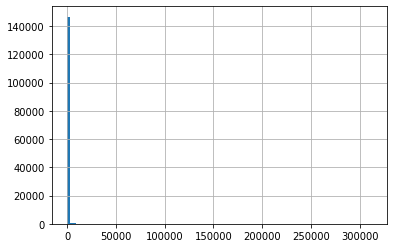

In [59]:
bdinfo_df['대지_면적(㎡)'].hist(bins=100)

In [61]:
zero_land_area_df = bdinfo_no_dupes_df[bdinfo_no_dupes_df['대지_면적(㎡)'] == 0]

In [62]:
print(zero_land_area_df.shape)

(47592, 55)


In [63]:
zero_land_area_df.head(50)

,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부
21,일반,일반건축물,서울특별시 강남구 개포동 1165-2번지,1165,2,0,NaN,0.0,136.26,0.00,744.84,669.24,0.00,철근콘크리트구조,철근콘크리트조 연와조,제2종근린생활시설,"근린생활시설, 단독주택",(철근)콘크리트,슬라브,0,1,5,1,0,0,0,0.00,744.84,0,0.0,0,0.0,0,0.0,0,0.0,19900326.0,NaN,19910115.0,1990.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20120517,서울특별시 강남구 개포동 1165-2,2012,비주거용,주거용
45,일반,일반건축물,서울특별시 강남구 개포동 1171-2번지,1171,2,0,NaN,0.0,86.31,0.00,246.87,160.56,0.00,벽돌구조,연와조,단독주택,단독주택,(철근)콘크리트,슬라브위기와,0,1,2,1,0,0,0,0.00,246.87,0,0.0,0,0.0,0,0.0,0,0.0,19890221.0,NaN,19890421.0,1989.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20121031,서울특별시 강남구 개포동 1171-2,2012,주거용,주거용
90,집합,표제부,서울특별시 강남구 개포동 1180-7번지,1180,7,0,NaN,0.0,85.44,0.00,325.50,240.06,0.00,철근콘크리트구조,철근콘크리트조 연와조,공동주택,다세대주택,(철근)콘크리트,슬라브,8,0,3,1,0,0,0,0.00,325.50,0,0.0,0,0.0,0,0.0,0,0.0,19900508.0,NaN,19900228.0,1990.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170215,서울특별시 강남구 개포동 1180-7,2017,주거용,주거용
94,일반,일반건축물,서울특별시 강남구 개포동 1181-6번지,1181,6,0,NaN,0.0,89.69,0.00,249.61,159.92,0.00,벽돌구조,연와조,단독주택,주거시설,(철근)콘크리트,슬라브위기와,0,1,2,1,0,0,0,0.00,249.61,0,0.0,0,0.0,0,0.0,0,0.0,19880316.0,NaN,19880608.0,1988.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20111123,서울특별시 강남구 개포동 1181-6,2011,주거용,주거용
96,집합,표제부,서울특별시 강남구 개포동 1181-7번지,1181,7,0,NaN,0.0,83.22,0.00,249.66,166.44,0.00,벽돌구조,연와조,공동주택,다세대주택,(철근)콘크리트,슬라브 모임지붕,6,0,2,1,0,0,0,0.00,249.66,0,0.0,0,0.0,0,0.0,0,0.0,19881010.0,NaN,19891025.0,1988.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170718,서울특별시 강남구 개포동 1181-7,2017,주거용,주거용
97,일반,일반건축물,서울특별시 강남구 개포동 1181-8번지,1181,8,0,NaN,0.0,87.78,0.00,247.68,159.90,0.00,벽돌구조,연와조,단독주택,주거시설,(철근)콘크리트,슬라브위기와,0,1,2,1,0,0,0,0.00,247.68,0,0.0,0,0.0,0,0.0,0,0.0,19880415.0,NaN,19881028.0,1988.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170718,서울특별시 강남구 개포동 1181-8,2017,주거용,주거용
113,집합,표제부,서울특별시 강남구 개포동 1185번지,1185,0,0,NaN,0.0,479.58,0.00,1941.92,1438.74,0.00,벽돌구조,연와조,공동주택,연립주택,(철근)콘크리트,슬라브위기와,15,0,3,1,0,0,0,0.00,1941.92,0,0.0,0,0.0,0,0.0,0,0.0,19890704.0,NaN,19900419.0,1989.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 개포동 1185-0,2017,주거용,주거용
127,집합,표제부,서울특별시 강남구 개포동 1190-10번지,1190,10,0,NaN,0.0,109.00,0.00,327.00,218.00,0.00,벽돌구조,연와조,공동주택,다세대주택,(철근)콘크리트,슬라브위기와,6,0,2,1,0,0,0,0.00,327.00,0,0.0,0,0.0,0,0.0,0,0.0,19880803.0,NaN,19881212.0,1988.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170307,서울특별시 강남구 개포동 1190-10,2017,주거용,주거용
128,집합,표제부,서울특별시 강남구 개포동 1190-9번지,1190,9,0,NaN,0.0,109.00,0.00,327.00,218.00,0.00,벽돌구조,연와조,공동주택,다세대주택,(철근)콘크리트,슬라브위슁글,6,0,2,1,0,0,0,0.00,327.00,0,0.0,0,0.0,0,0.0,0,0.0,19880803.0,NaN,19881219.0,1988.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170718,서울특별시 강남구 개포동 1190-9,2017,주거용,주거용
138,일반,일반건축물,서울특별시 강남구 개포동 1195-2번지,1195,2,0,NaN,0.0,114.03,45.32,319.68,205.65,77.46,벽돌구조,연와조,단독주택,단독주택,(철근)콘크리트,슬라브위기와,0,1,2,1,0,0,0,0.00,319.68,2,0.0,0,0.0,0,0.0,0,0.0,19890214.0,19890215.0,19890602.0,1989.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170519,서울특별시 강남구 개포동 1195-2,2017,주거용,주거용


In [64]:
prac_df = bdinfo_no_dupes_df.drop(zero_land_area_df.index)
print(prac_df.shape)

(98863, 55)


In [65]:
prac_df['주소'].nunique()

89410

In [66]:
bdinfo_2020_df = pd.read_csv(basedir + 'bdinfo_2020.csv')

C:\Users\나\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (15,58,59,67) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
print(bdinfo_2020_df.shape)
bdinfo_2020_df.head()

(604844, 77)


,관리_건축물대장_PK,대장_구분_코드,대장_구분_코드_명,대장_종류_코드,대장_종류_코드_명,대지_위치,도로명_대지_위치,건물_명,시군구_코드,법정동_코드,대지_구분_코드,번,지,특수지_명,블록,로트,외필지_수,새주소_도로_코드,새주소_법정동_코드,새주소_지상지하_코드,새주소_본_번,새주소_부_번,동_명,주_부속_구분_코드,주_부속_구분_코드_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조_코드,구조_코드_명,기타_구조,주_용도_코드,주_용도_코드_명,기타_용도,지붕_코드,지붕_코드_명,기타_지붕,세대_수(세대),가구_수(가구),높이(m),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관_코드,허가번호_기관_코드_명,허가번호_구분_코드,허가번호_구분_코드_명,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,내진_설계_적용_여부,내진_능력
0,11500-25658,1,일반,2,일반건축물,서울특별시 강서구 화곡동 366-90번지,서울특별시 강서구 가로공원로80가길 34,NaN,11500,10300.0,0.0,366,90,NaN,NaN,NaN,0,1.150041e+11,10301.0,0.0,34.0,0.0,NaN,0.0,주건축물,141.40,69.75,49.32,209.25,139.50,98.67,11.0,벽돌구조,연와조,01000,단독주택,단독주택,10.0,(철근)콘크리트,평스라브 일부 기와,0,1,7.90,2,1,0,0,0,0.0,209.25,0,0.0,0,0.0,0,0.00,0,0.0,19900321,19900521.0,19901116.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20181204,0.0,NaN
1,11200-21285,1,일반,2,일반건축물,서울특별시 성동구 성수동2가 301-27번지,,NaN,11200,11500.0,0.0,301,27,NaN,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,주건축물,90.42,0.00,0.00,206.12,0.00,0.00,21.0,철근콘크리트구조,철근콘크리트 연와조,01000,단독주택,다가구주택(4가구),10.0,(철근)콘크리트,평슬라브위주위기와,0,4,0.00,3,1,0,0,0,0.0,206.12,0,0.0,0,0.0,0,0.00,0,0.0,19900718,NaN,19901220.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20181205,0.0,NaN
2,11170-22196,2,집합,3,표제부,서울특별시 용산구 한강로2가 83-4번지,서울특별시 용산구 한강대로46길 25,NaN,11170,12500.0,0.0,83,4,NaN,NaN,NaN,0,1.117041e+11,12501.0,0.0,25.0,NaN,NaN,0.0,주건축물,219.90,119.72,54.44,536.88,436.51,198.50,21.0,철근콘크리트구조,철근콘크리트구조,04000,제2종근린생활시설,제1.2종근린생활시설,10.0,(철근)콘크리트,평스라브,13,0,13.35,5,1,0,0,0,0.0,536.88,0,0.0,0,0.0,2,39.91,2,23.0,20070215,20070226.0,20070731.0,2007.0,3020078.0,건축과,1101.0,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20191004,1.0,NaN
3,11260-100245871,1,일반,2,일반건축물,서울특별시 중랑구 면목동 455-2번지,서울특별시 중랑구 면목로54길 44,NaN,11260,10100.0,0.0,455,2,NaN,NaN,NaN,0,1.126041e+11,10101.0,0.0,44.0,NaN,NaN,0.0,주건축물,183.10,109.32,59.71,365.32,365.32,199.52,21.0,철근콘크리트구조,철근콘크리트구조,01000,단독주택,단독주택 및 근린생활시설,10.0,(철근)콘크리트,(철근)콘크리트,0,8,13.65,5,0,1,0,0,0.0,365.32,0,0.0,0,0.0,6,69.00,0,0.0,20180614,20180617.0,20190104.0,2018.0,3060155.0,건축디자인과,1101.0,신축허가,2,NaN,0.0,0,NaN,0,NaN,0,20191004,0.0,NaN
4,11560-34227,1,일반,2,일반건축물,서울특별시 영등포구 대림동 1057-25번지,서울특별시 영등포구 도림천로11길 15-6,NaN,11560,13300.0,0.0,1057,25,NaN,NaN,NaN,0,1.156042e+11,13301.0,0.0,15.0,6.0,NaN,0.0,주건축물,0.00,53.25,0.00,159.75,106.50,0.00,11.0,벽돌구조,연와조,01000,단독주택,주택,10.0,(철근)콘크리트,스라브,0,1,0.00,2,1,0,0,0,0.0,159.75,0,0.0,0,0.0,0,0.00,0,0.0,19850422,NaN,19850802.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20191004,0.0,NaN


In [68]:
(bdinfo_2020_df['대지_면적(㎡)'] == 0).sum()

267208

In [69]:
main_df = bdinfo_2020_df[bdinfo_2020_df['주_부속_구분_코드_명'] == '주건축물']
(main_df['대지_면적(㎡)'] == 0).sum()

254314

In [70]:
bdinfo_2019_df = pd.read_csv(basedir + 'bdinfo_2019.csv')
print(bdinfo_2019_df.shape)
bdinfo_2019_df.head()

C:\Users\나\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (15,58,59,61,67) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(610634, 75)


,관리_건축물대장_PK,대장_구분_코드,대장_구분_코드_명,대장_종류_코드,대장_종류_코드_명,대지_위치,도로명_대지_위치,건물_명,시군구_코드,법정동_코드,대지_구분_코드,번,지,특수지_명,블록,로트,외필지_수,새주소_도로_코드,새주소_법정동_코드,새주소_지상지하_코드,새주소_본_번,새주소_부_번,동_명,주_부속_구분_코드,주_부속_구분_코드_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조_코드,구조_코드_명,기타_구조,주_용도_코드,주_용도_코드_명,기타_용도,지붕_코드,지붕_코드_명,기타_지붕,세대_수(세대),가구_수(가구),높이(m),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관_코드,허가번호_기관_코드_명,허가번호_구분_코드,허가번호_구분_코드_명,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자
0,11260-21410,1,일반,2,일반건축물,서울특별시 중랑구 중화동 441-2번지,서울특별시 중랑구 봉화산로33길 35,NaN,11260,10300.0,0.0,441,2,NaN,NaN,NaN,0,1.126041e+11,10301.0,0.0,35.0,0.0,NaN,0.0,주건축물,209.0,124.94,59.78,476.31,353.46,169.12,21.0,철근콘크리트구조,철근콘크리트구조,01000,단독주택,단독주택,10.0,(철근)콘크리트,(철근)콘크리트 평슬라브,0,4,10.90,3,1,0,0,0,0.0,0.00,0,0.0,0,0.0,4,122.85,0,0.0,20030117,20030217.0,20030707.0,2003.0,3060079.0,건축과,1101.0,신축허가,0,NaN,0.0,0,NaN,0,NaN,0,20120728
1,11410-17271,2,집합,3,표제부,서울특별시 서대문구 연희동 151-82번지,서울특별시 서대문구 연희로31길 19-3,NaN,11410,11700.0,0.0,151,82,NaN,NaN,NaN,0,1.141041e+11,11701.0,0.0,19.0,3.0,NaN,0.0,주건축물,188.0,111.93,59.54,532.24,398.45,211.94,21.0,철근콘크리트구조,철근콘크리트조,02000,공동주택,다세대주택,10.0,(철근)콘크리트,평스라브,4,0,11.75,4,1,0,0,0,0.0,532.24,0,0.0,0,0.0,4,133.79,0,0.0,20000419,20000421.0,20001027.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170222
2,11500-18632,1,일반,2,일반건축물,서울특별시 강서구 화곡동 166-33번지,서울특별시 강서구 강서로18길 125,화곡동상가주택,11500,10300.0,0.0,166,33,NaN,NaN,NaN,0,1.150041e+11,10301.0,0.0,125.0,0.0,화곡동상가주택,0.0,주건축물,281.9,159.59,56.61,482.05,433.28,153.70,21.0,철근콘크리트구조,철근콘크리트조및조적조,01000,단독주택,근린생활시설및다가구주택(4가구),10.0,(철근)콘크리트,평스라브,0,4,10.50,3,1,0,0,0,0.0,147.28,0,0.0,0,0.0,0,0.00,4,46.0,19921022,19921027.0,19930413.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170222
3,11230-27115,1,일반,2,일반건축물,서울특별시 동대문구 휘경동 179-71번지,서울특별시 동대문구 휘경로12나길 10-1,NaN,11230,10900.0,0.0,179,71,NaN,NaN,NaN,0,1.123041e+11,10901.0,0.0,10.0,1.0,NaN,0.0,주건축물,120.0,58.50,48.75,215.24,0.00,135.08,21.0,철근콘크리트구조,"철근콘크리트조, 연와조",01000,단독주택,"근린생활시설, 다가구용단독주택(3가구)",10.0,(철근)콘크리트,평스라브,0,3,10.10,3,1,0,0,0,0.0,215.24,0,0.0,0,0.0,0,0.00,1,0.0,19960527,19960619.0,19961224.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170222
4,11290-24433,1,일반,2,일반건축물,서울특별시 성북구 길음동 1070-29번지,서울특별시 성북구 동소문로 267,NaN,11290,13400.0,0.0,1070,29,NaN,NaN,NaN,0,1.129031e+11,13411.0,0.0,267.0,0.0,NaN,0.0,주건축물,0.0,0.00,0.00,249.86,249.86,0.00,21.0,철근콘크리트구조,철근콩크리트,01000,단독주택,"주택, 점포",10.0,(철근)콘크리트,스라브,0,1,0.00,4,0,0,0,0,0.0,249.86,0,0.0,0,0.0,0,0.00,0,0.0,NaN,NaN,19680421.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20170222


In [72]:
main_df = bdinfo_2019_df[bdinfo_2019_df['주_부속_구분_코드_명'] == '주건축물']
(main_df['대지_면적(㎡)'] == 0).sum()

261179

In [76]:
no_base_area_df = bdinfo_no_dupes_df[bdinfo_no_dupes_df['건축_면적(㎡)'] == 0]
print(no_base_area_df.shape)
no_base_area_df.head()

(9362, 55)


,대장_구분,대장_종류,대지_위치,번,지,외필지_수,동_명,대지_면적(㎡),건축_면적(㎡),건폐_율(%),연면적(㎡),용적_률_산정_연면적(㎡),용적_률(%),구조,기타_구조,주_용도,기타_용도,지붕,기타_지붕,세대_수(세대),가구_수(가구),지상_층_수,지하_층_수,승용_승강기_수,비상용_승강기_수,부속_건축물_수,부속_건축물_면적(㎡),총_동_연면적(㎡),옥내_기계식_대수(대),옥내_기계식_면적(㎡),옥외_기계식_대수(대),옥외_기계식_면적(㎡),옥내_자주식_대수(대),옥내_자주식_면적(㎡),옥외_자주식_대수(대),옥외_자주식_면적(㎡),허가_일,착공_일,사용승인_일,허가번호_년,허가번호_기관,허가번호_구분,호_수(호),에너지효율_등급,에너지절감_율,에너지_EPI점수,친환경_건축물_등급,친환경_건축물_인증점수,지능형_건축물_등급,지능형_건축물_인증점수,생성_일자,주소,생성년도,주용도_주거용여부,기타용도_주거용여부
2133,집합,표제부,서울특별시 강남구 대치동 893번지,893,0,0,생활편익시설,0.0,0.0,0.0,971.49,0.00,0.0,철근콘크리트구조,"철근콘크리트구조,라멘조",공동주택,공동주택,(철근)콘크리트,(철근)콘크리트,0,0,0,2,0,0,0,0.0,971.49,0,0.0,0,0.0,239,7726.48,7,80.5,19990610.0,19990930.0,20020829.0,1999.0,주택과,주택건설사업계획승인,16,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 대치동 893-0,2017,주거용,주거용
2736,집합,표제부,서울특별시 강남구 대치동 971-6번지,971,6,0,NaN,127.8,0.0,0.0,195.21,0.00,0.0,벽돌구조,조적조,공동주택,다세대주택(3세대),(철근)콘크리트,평슬라브,3,0,2,1,0,0,0,0.0,195.21,0,0.0,0,0.0,0,0.00,0,0.0,19950225.0,19950304.0,19950520.0,1995.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171118,서울특별시 강남구 대치동 971-6,2017,주거용,주거용
2865,집합,표제부,서울특별시 강남구 대치동 992번지,992,0,1,101,0.0,0.0,0.0,12133.69,0.00,0.0,철근콘크리트구조,철근콘크리트조,공동주택,공동주택,(철근)콘크리트,슬라브,120,0,15,1,0,0,0,0.0,12133.69,0,0.0,0,0.0,0,0.00,0,0.0,19870914.0,NaN,19900419.0,1987.0,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 대치동 992-0,2017,주거용,주거용
4289,집합,표제부,서울특별시 강남구 수서동 746번지,746,0,0,1005,0.0,0.0,0.0,6941.16,6926.04,0.0,철근콘크리트구조,철근콘크리트조,공동주택,주거시설,(철근)콘크리트,슬라브,149,0,15,1,0,0,0,0.0,6941.16,0,0.0,0,0.0,0,0.00,0,0.0,NaN,19901231.0,19930908.0,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20171206,서울특별시 강남구 수서동 746-0,2017,주거용,주거용
4291,집합,표제부,서울특별시 강남구 수서동 746번지,746,0,0,1007,0.0,0.0,0.0,13908.60,13893.48,0.0,철근콘크리트구조,철근콘크리트조,공동주택,주거시설,(철근)콘크리트,슬라브,239,0,15,1,0,0,0,0.0,13908.60,0,0.0,0,0.0,0,0.00,0,0.0,NaN,19901231.0,19930908.0,NaN,NaN,NaN,0,NaN,0.0,0,NaN,0,NaN,0,20190326,서울특별시 강남구 수서동 746-0,2019,주거용,주거용
